In [1]:
import pandas as pd
import yfinance as yf
import intrinio_sdk
import numpy as np
import cufflinks as cf
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import statsmodels.api as sm 
import statsmodels.tsa.api as smt
import quandl
import datetime
import talib # Permite calcular muchos indices y herramientas de detección de patrones en velas japoneas




from pandas_datareader import data as pdr
from plotly.offline import iplot, init_notebook_mode

# set up configuration (run it once) 

cf.set_config_file(world_readable=True, theme='pearl',  offline=True)
init_notebook_mode()

# Para graficar correctamente en el notebook hacemos lo siguiente
                   
%matplotlib inline 
%config InlineBackend.figure_format ='retina' # double the resolution of the plots we make
                   
pylab.rcParams['figure.figsize'] = 15, 15 # Definimos el tamaño de los gráficos para que se ajusten bien al notebook

In [83]:
QUANDL_KEY = 'gS_NinqJDsEqiAsmxhr3' 
quandl.ApiConfig.api_key = QUANDL_KEY # Authenticate using the personal API key

In [84]:
# Authenticate using the personal API key
intrinio_sdk.ApiClient().configuration.api_key['api_key'] = 'OjYyMGQxOTZhM2FjNzhkODBmMGI5MWQxYjVjOTQzNDBj'
security_api = intrinio_sdk.SecurityApi()

In [85]:
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2020,4,14)
tickers = ['AAPL', 'NFLX']
data = pdr.get_data_yahoo(tickers, start = start, end = end)

In [86]:
data.index # su indice son las fechas de los dias cotizados

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-13', '2020-04-14'],
              dtype='datetime64[ns]', name='Date', length=1581, freq=None)

In [87]:
data.columns # las columnas recogen los distintos valores de cada dia

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'NFLX'),
            (    'Close', 'AAPL'),
            (    'Close', 'NFLX'),
            (     'High', 'AAPL'),
            (     'High', 'NFLX'),
            (      'Low', 'AAPL'),
            (      'Low', 'NFLX'),
            (     'Open', 'AAPL'),
            (     'Open', 'NFLX'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'NFLX')],
           names=['Attributes', 'Symbols'])

In [88]:
data[['Close']][-10:] # Veamos los diez últimos valores de cierre.

Attributes       Close            
Symbols           AAPL        NFLX
Date                              
2020-03-31  254.289993  375.500000
2020-04-01  240.910004  364.079987
2020-04-02  244.929993  370.079987
2020-04-03  241.410004  361.760010
2020-04-06  262.470001  379.959991
2020-04-07  259.429993  372.279999
2020-04-08  266.070007  371.119995
2020-04-09  267.989990  370.720001
2020-04-13  273.250000  396.720001
2020-04-14  287.049988  413.549988

In [89]:
data['Close'].head() # Columnas de Close

Symbols          AAPL       NFLX
Date                            
2014-01-02  79.018570  51.831429
2014-01-03  77.282860  51.871429
2014-01-06  77.704285  51.367142
2014-01-07  77.148575  48.500000
2014-01-08  77.637146  48.712856

In [90]:
data.iloc[:, 0] # Primera columna

Date
2014-01-02     70.938835
2014-01-03     69.380615
2014-01-06     69.758965
2014-01-07     69.260056
2014-01-08     69.698692
                 ...    
2020-04-07    259.429993
2020-04-08    266.070007
2020-04-09    267.989990
2020-04-13    273.250000
2020-04-14    287.049988
Name: (Adj Close, AAPL), Length: 1581, dtype: float64

In [91]:
data.loc[:, ['Open', 'Close', 'Volume']] # Columnas Open, Close y Volume

Attributes       Close                    Open                   Volume  \
Symbols           AAPL        NFLX        AAPL        NFLX         AAPL   
Date                                                                      
2014-01-02   79.018570   51.831429   79.382858   52.401428   58671200.0   
2014-01-03   77.282860   51.871429   78.980003   52.000000   98116900.0   
2014-01-06   77.704285   51.367142   76.778572   51.889999  103152700.0   
2014-01-07   77.148575   48.500000   77.760002   49.684284   79302300.0   
2014-01-08   77.637146   48.712856   76.972855   48.104286   64632400.0   
...                ...         ...         ...         ...          ...   
2020-04-07  259.429993  372.279999  270.799988  380.000000   50721800.0   
2020-04-08  266.070007  371.119995  262.739990  374.010010   42223800.0   
2020-04-09  267.989990  370.720001  268.700012  371.059998   40529100.0   
2020-04-13  273.250000  396.720001  268.309998  371.309998   32755700.0   
2020-04-14  287.049988  413.549988  280.000000  397.500000   48748700.0   

Attributes              
Symbols           NFLX  
Date                    
2014-01-02  12325600.0  
2014-01-03  10817100.0  
2014-01-06  15501500.0  
2014-01-07  36167600.0  
2014-01-08  20001100.0  
...                ...  
2020-04-07   7046400.0  
2020-04-08   6908900.0  
2020-04-09   7711300.0  
2020-04-13  11692900.0  
2020-04-14  11581000.0  

[1581 rows x 6 columns]

In [92]:
data[['Close','Volume']].loc[pd.Timestamp('2015-11-01'):pd.Timestamp('2015-11-10')] 
# El cierrre y el volumen desde el 1 al 10 de novimbre de 2015

Attributes       Close                  Volume            
Symbols           AAPL        NFLX        AAPL        NFLX
Date                                                      
2015-11-02  121.180000  107.639999  32203300.0  11784600.0
2015-11-03  122.570000  109.739998  45519000.0  12484100.0
2015-11-04  122.000000  114.050003  44886100.0  17505000.0
2015-11-05  120.919998  113.500000  39552700.0  13814900.0
2015-11-06  121.059998  114.059998  33042300.0  10936600.0
2015-11-09  120.570000  109.860001  33871400.0  16154600.0
2015-11-10  116.769997  112.699997  59127900.0  11166400.0

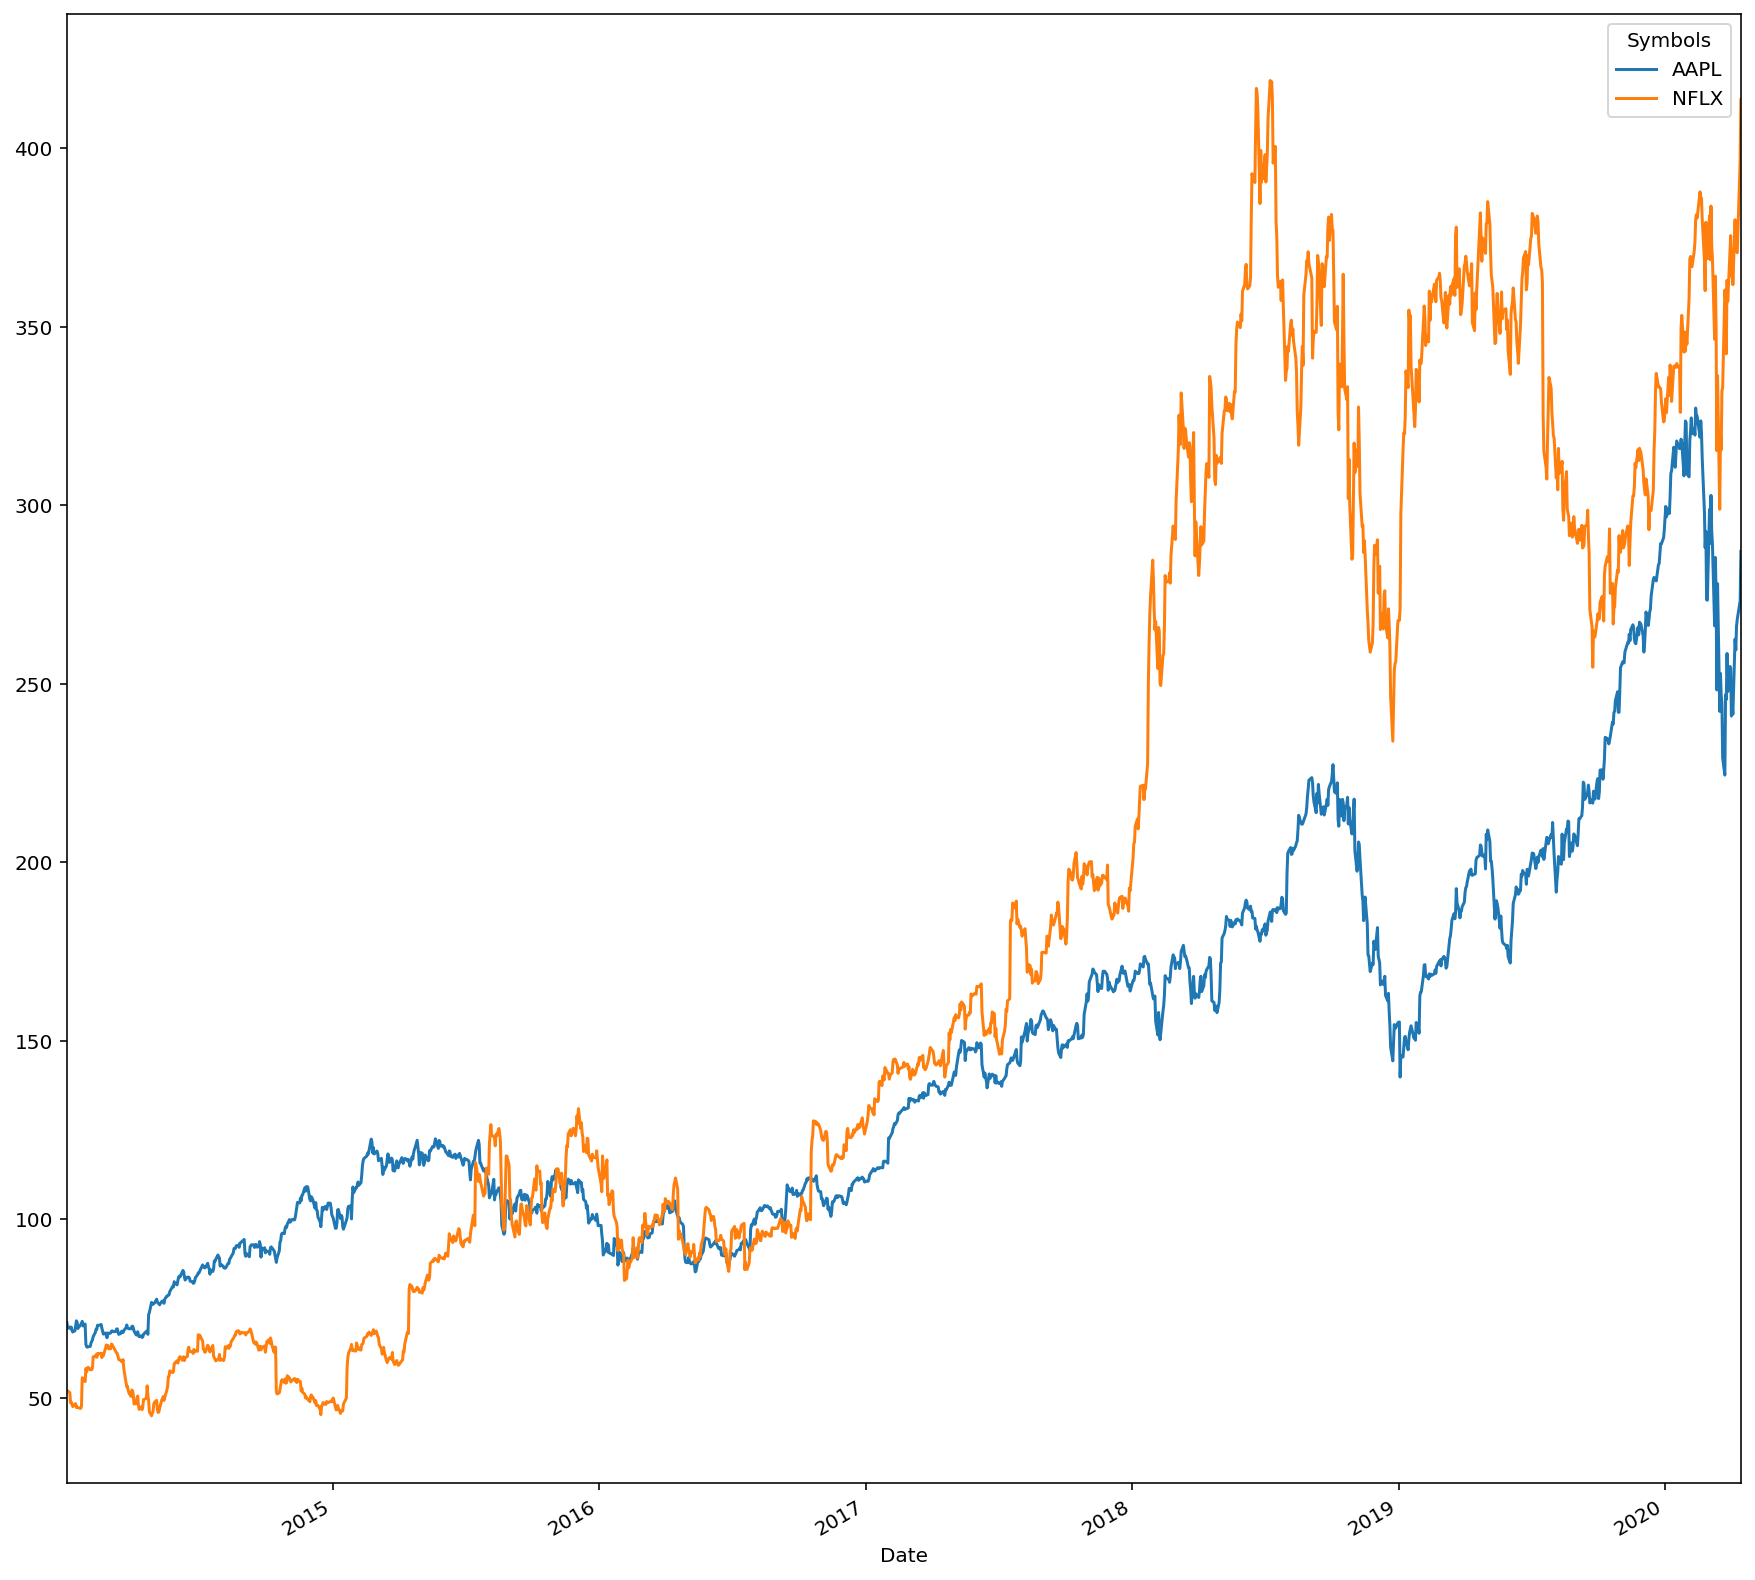

In [93]:
data['Adj Close'].plot()

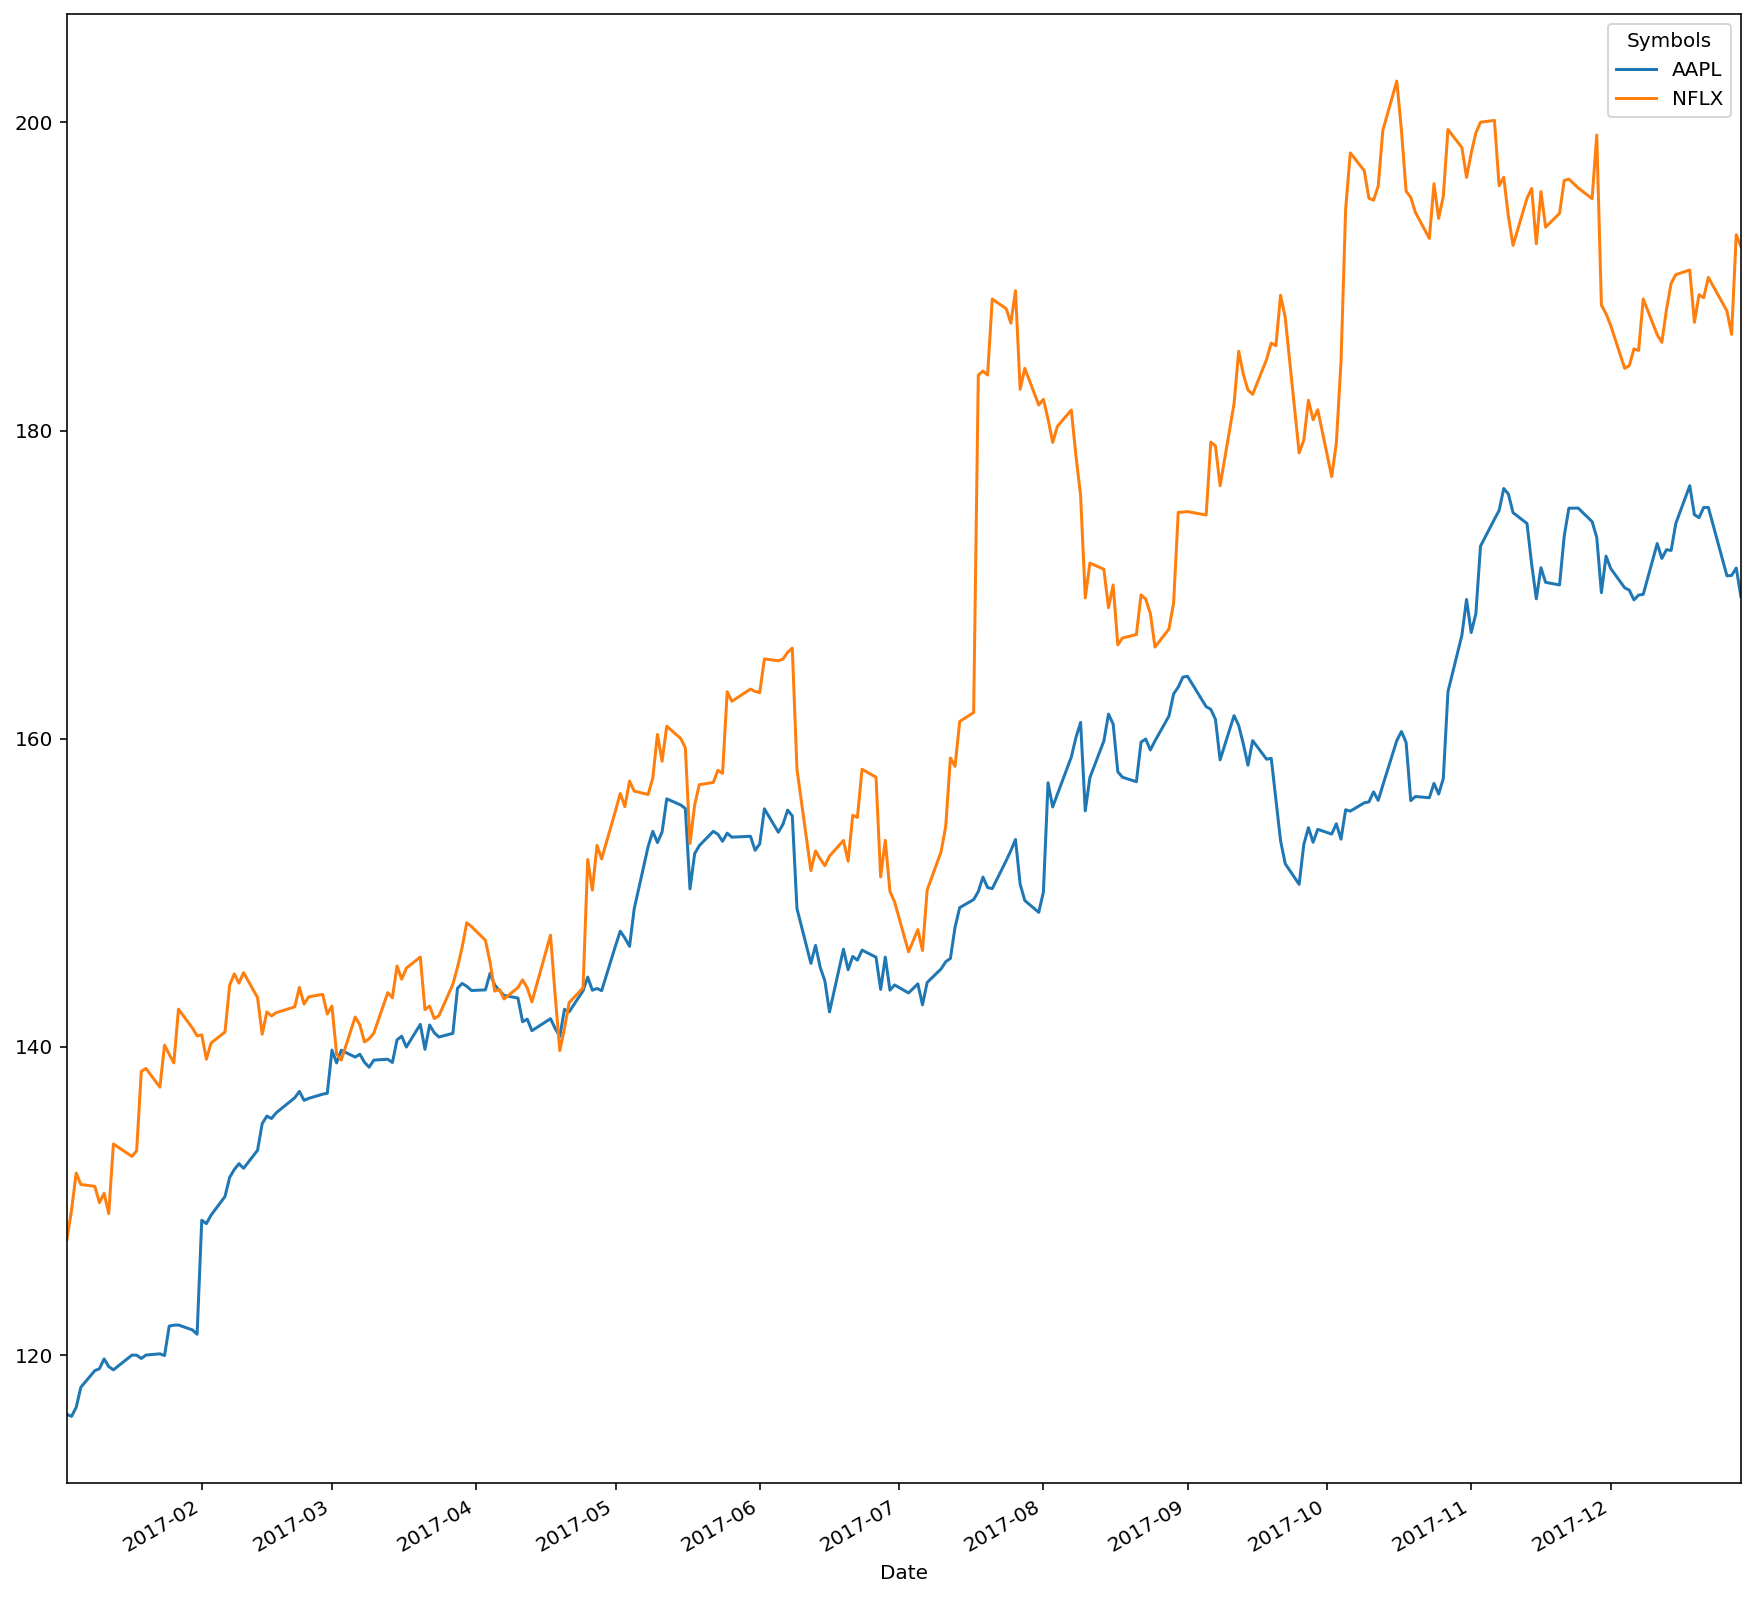

In [94]:
data['Close'][data.index.year==2017].plot() #Gráfico de un solo año

In [95]:
AAPL = pdr.get_data_yahoo('AAPL', start = start, end = end)

In [96]:
def remuestreo(df, tiempo):
    df=df.resample(tiempo).agg({'Open': 'first', 
                                     'High': 'max', 
                                     'Low': 'min', 
                                     'Close': 'last',
                                     'Adj Close': 'last',
                                     'Volume': 'sum'})
    return df

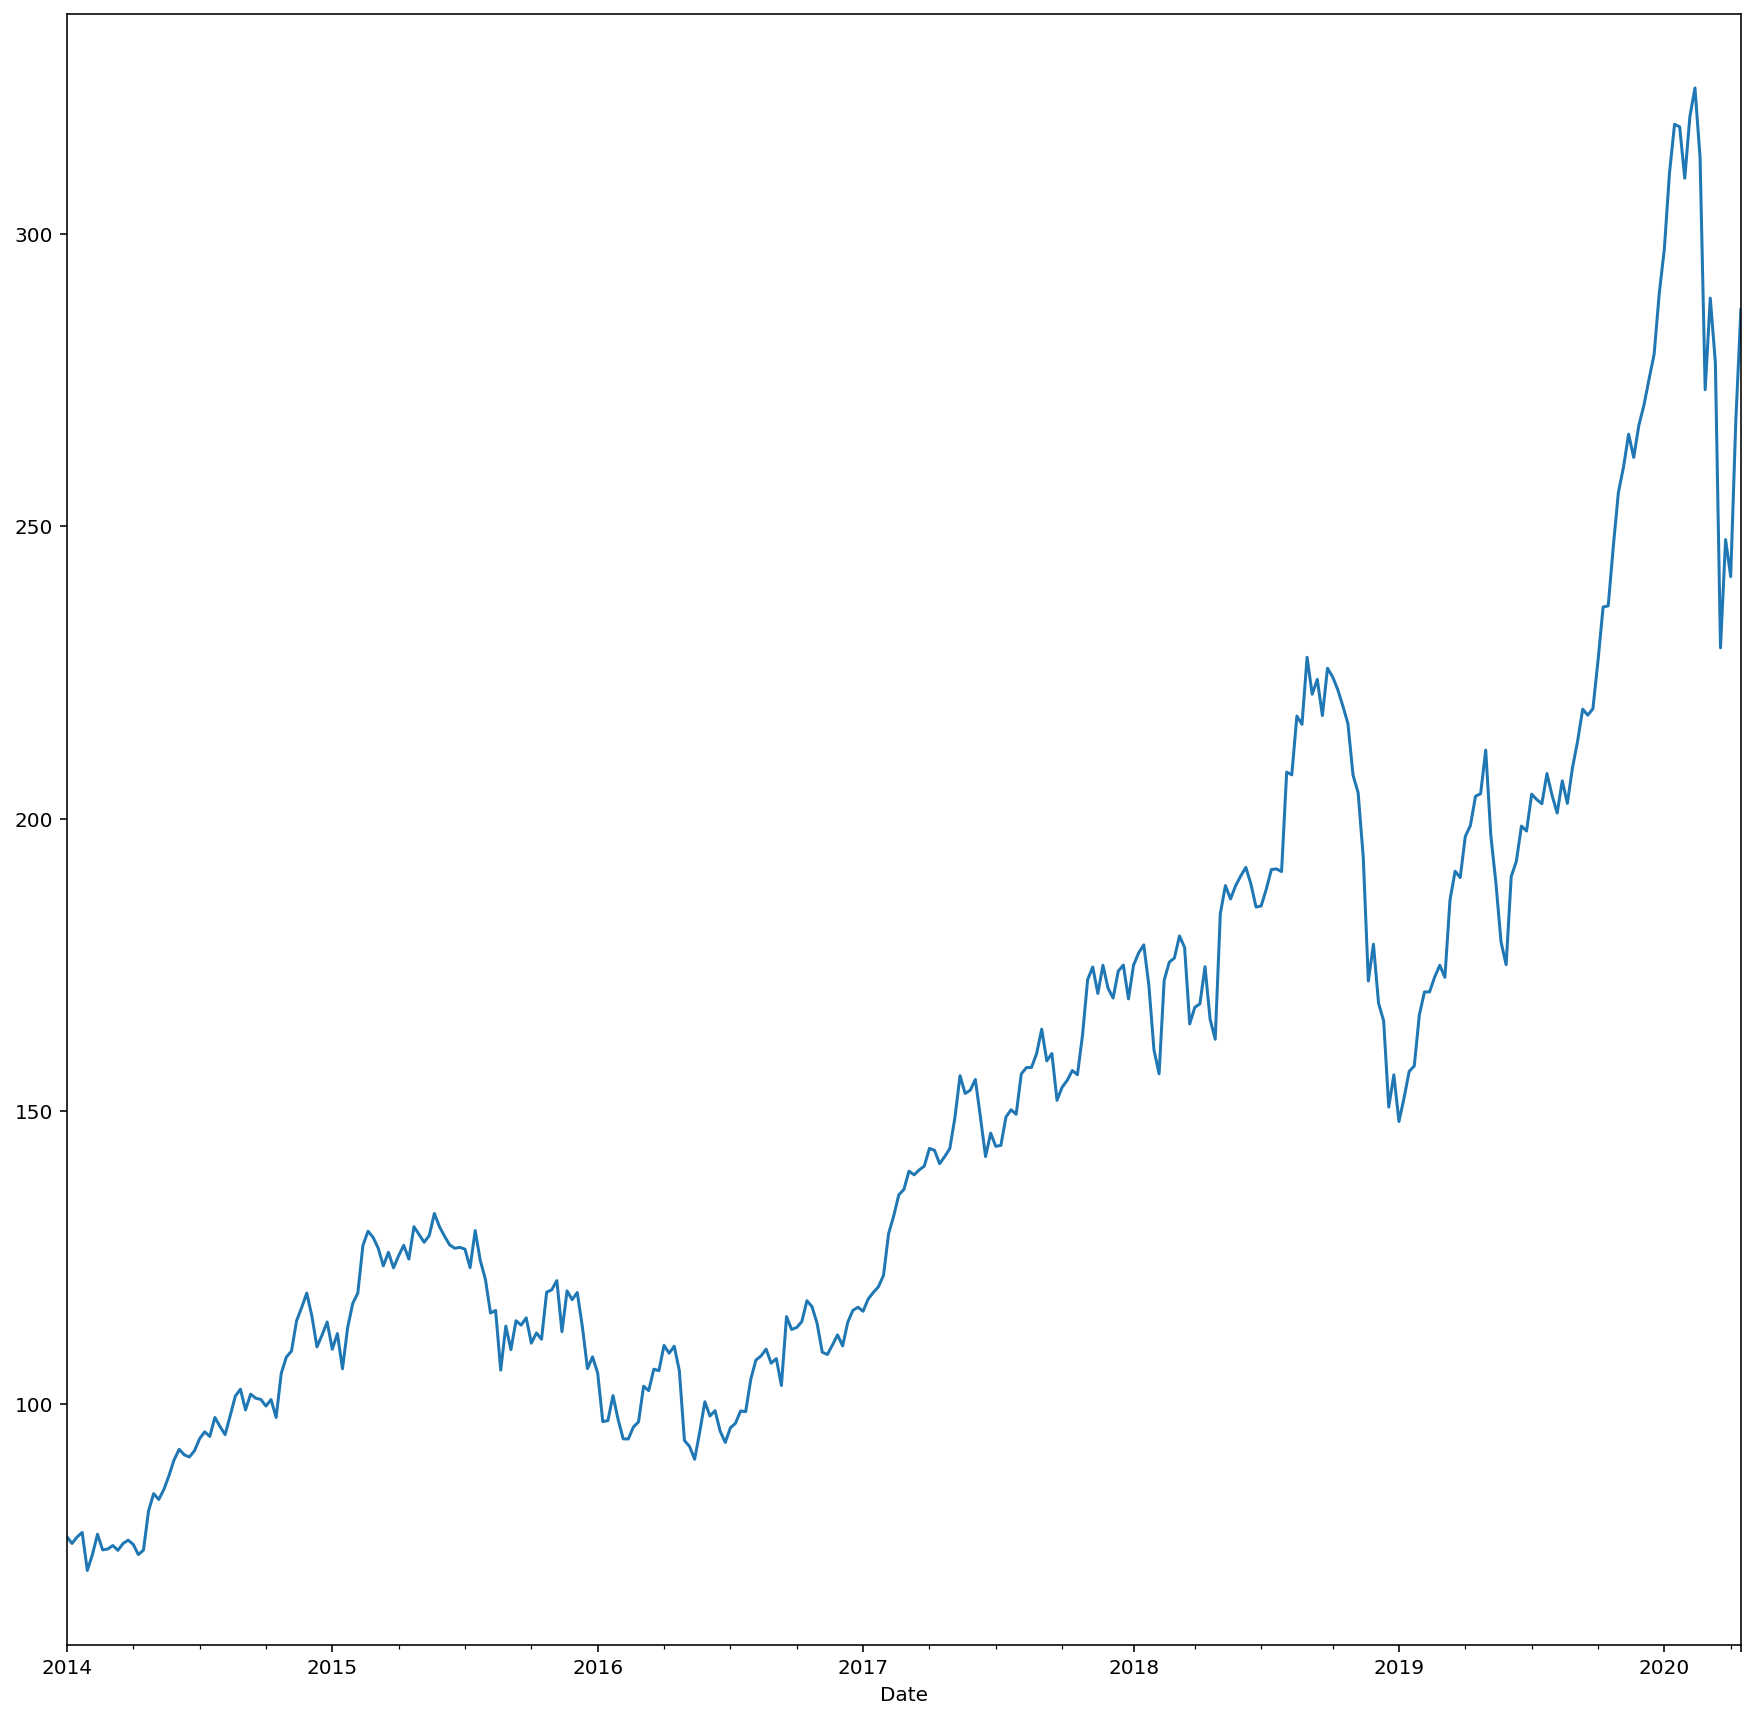

In [97]:
AAPL_W = remuestreo(AAPL,'W')
AAPL_W['Close'].plot()

In [98]:
data['SMA7']= data['Close']['AAPL'].rolling(window=7).mean() # Media simple de 7 días

In [99]:
AAPL['SMA10'] = AAPL['Close'].rolling(window = 10).mean()
AAPL['SMA20'] = AAPL['Close'].rolling(window = 20).mean()

In [100]:
AAPL.head(20)

High        Low       Open      Close       Volume  \
Date                                                                  
2014-01-02  79.575714  78.860001  79.382858  79.018570   58671200.0   
2014-01-03  79.099998  77.204285  78.980003  77.282860   98116900.0   
2014-01-06  78.114288  76.228569  76.778572  77.704285  103152700.0   
2014-01-07  77.994286  76.845711  77.760002  77.148575   79302300.0   
2014-01-08  77.937141  76.955711  76.972855  77.637146   64632400.0   
2014-01-09  78.122856  76.478569  78.114288  76.645714   69787200.0   
2014-01-10  77.257141  75.872856  77.118568  76.134285   76244000.0   
2014-01-13  77.500000  75.697144  75.701431  76.532860   94623200.0   
2014-01-14  78.104286  76.808571  76.888573  78.055717   83140400.0   
2014-01-15  80.028572  78.808571  79.074287  79.622856   97909700.0   
2014-01-16  79.550003  78.811432  79.271431  79.178574   57319500.0   
2014-01-17  78.867142  77.128571  78.782860  77.238571  106684900.0   
2014-01-21  78.581429  77.202858  77.284286  78.438568   82131700.0   
2014-01-22  79.612854  78.258568  78.701431  78.787140   94996300.0   
2014-01-23  79.500000  77.830002  78.562859  79.454285  100809800.0   
2014-01-24  79.374283  77.821426  79.142860  78.010002  107338700.0   
2014-01-27  79.257141  77.964287  78.581429  78.642860  138719700.0   
2014-01-28  73.571426  71.724289  72.680000  72.357140  266380800.0   
2014-01-29  72.481430  71.231430  71.992859  71.535713  125702500.0   
2014-01-30  72.357140  70.957146  71.791428  71.397141  169625400.0   

            Adj Close      SMA10      SMA20  
Date                                         
2014-01-02  70.938835        NaN        NaN  
2014-01-03  69.380615        NaN        NaN  
2014-01-06  69.758965        NaN        NaN  
2014-01-07  69.260056        NaN        NaN  
2014-01-08  69.698692        NaN        NaN  
2014-01-09  68.808632        NaN        NaN  
2014-01-10  68.349464        NaN        NaN  
2014-01-13  68.707298        NaN        NaN  
2014-01-14  70.074440        NaN        NaN  
2014-01-15  71.481361  77.578287        NaN  
2014-01-16  71.082497  77.594287        NaN  
2014-01-17  69.340851  77.589858        NaN  
2014-01-21  70.418167  77.663287        NaN  
2014-01-22  70.731079  77.827143        NaN  
2014-01-23  71.330017  78.008857        NaN  
2014-01-24  70.033424  78.145286        NaN  
2014-01-27  70.601562  78.396143        NaN  
2014-01-28  64.958565  77.978571        NaN  
2014-01-29  64.221123  77.326571        NaN  
2014-01-30  64.096725  76.503999  77.041143

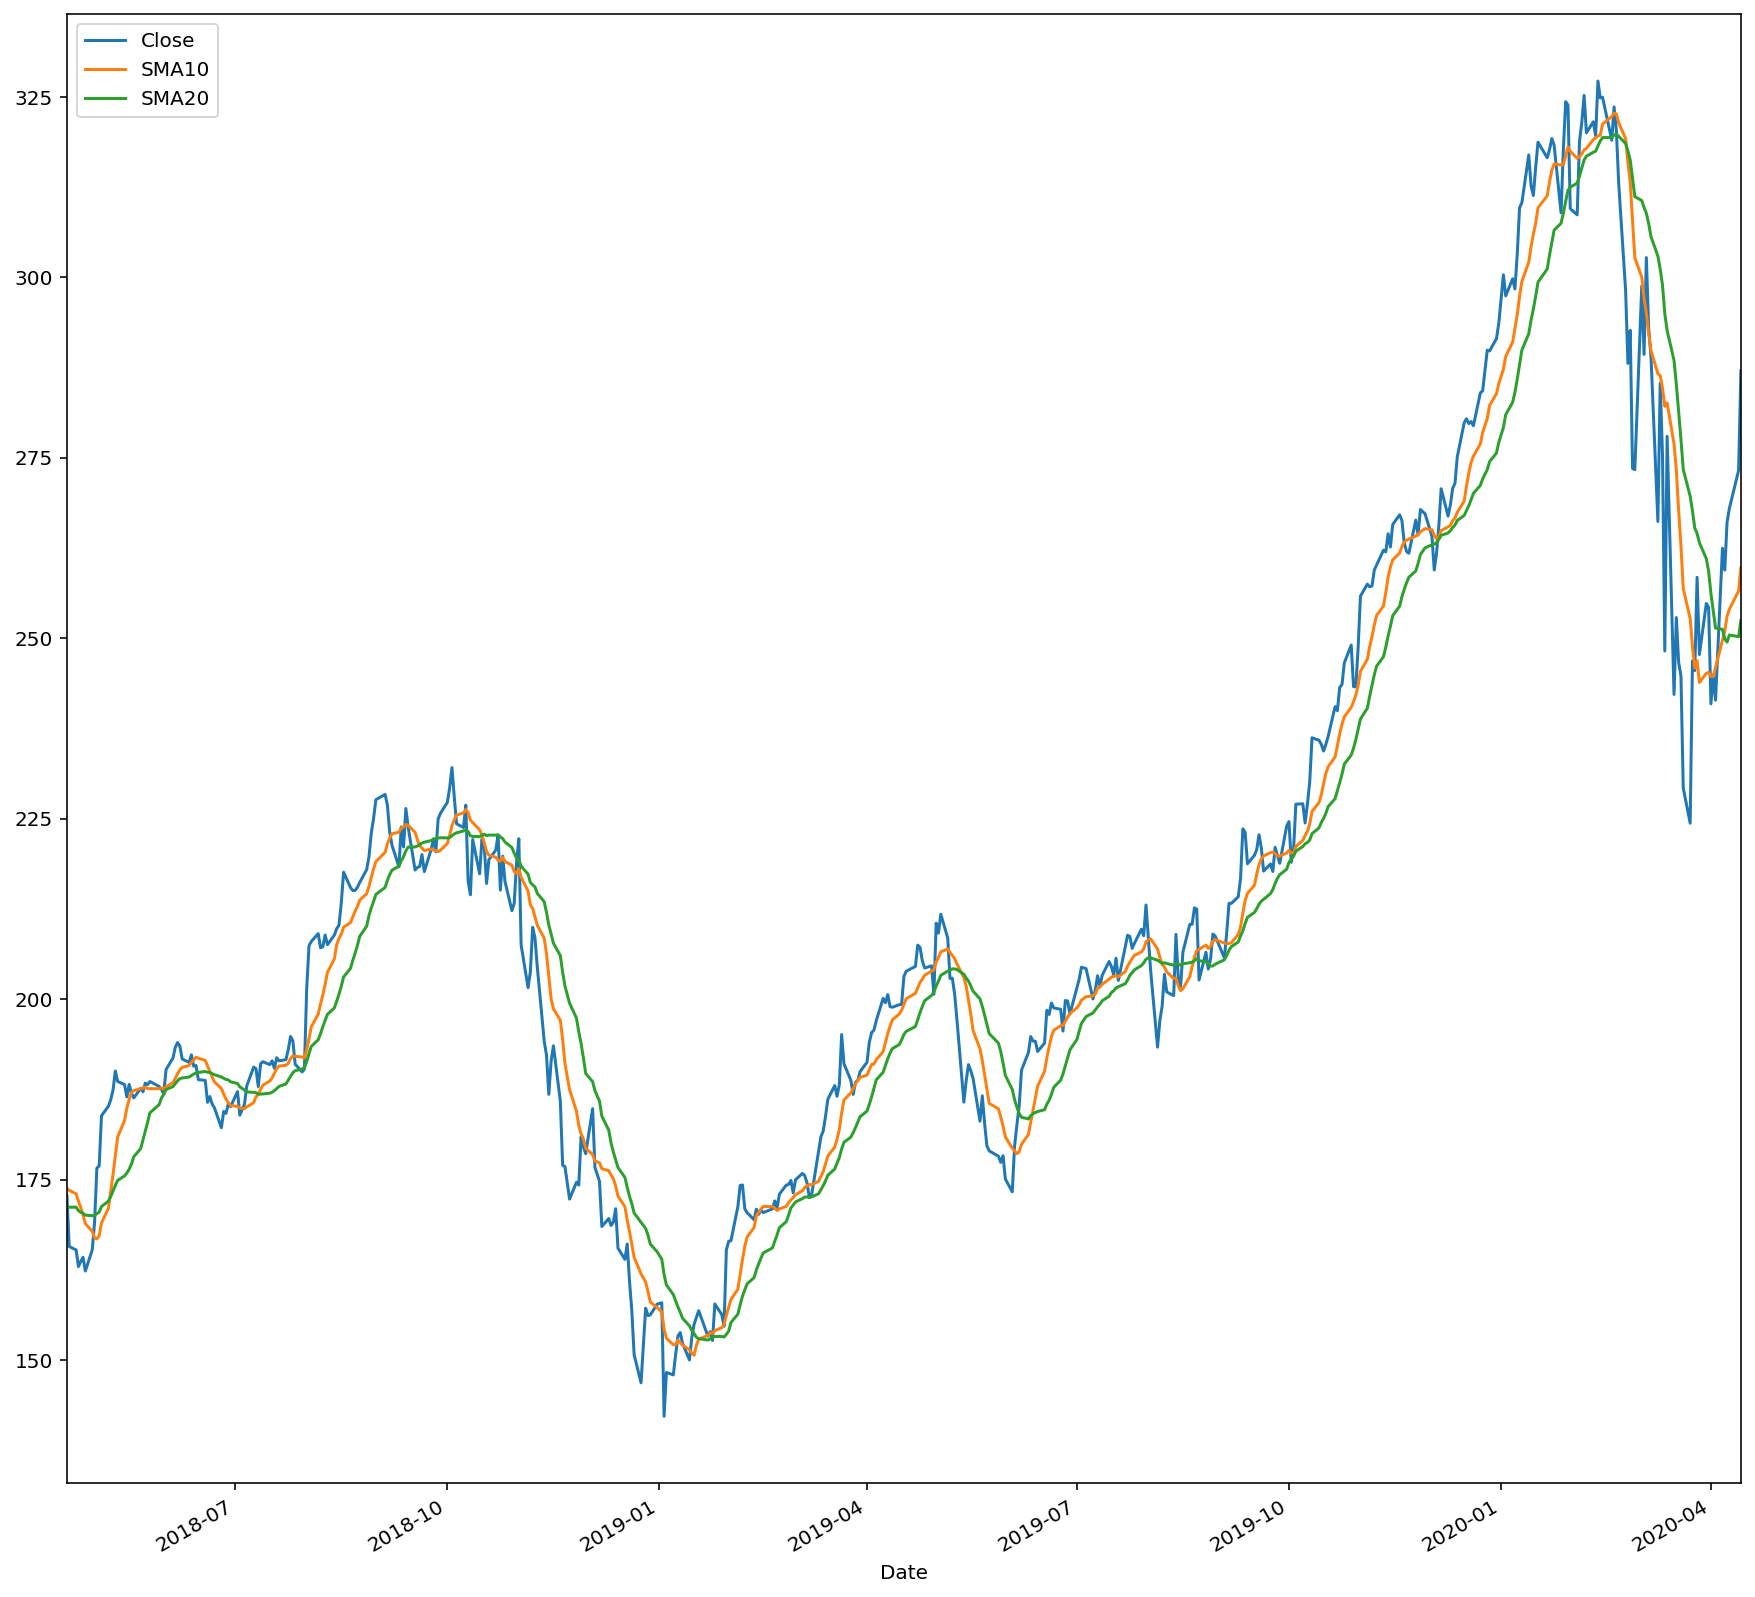

In [101]:
AAPL[['Close','SMA10','SMA20']].iloc[-500:].plot()

In [102]:
AAPL['EMA20']=talib.EMA(AAPL['Close'].values, timeperiod=20)
AAPL['EMA60']=talib.EMA(AAPL['Close'].values, timeperiod=60)

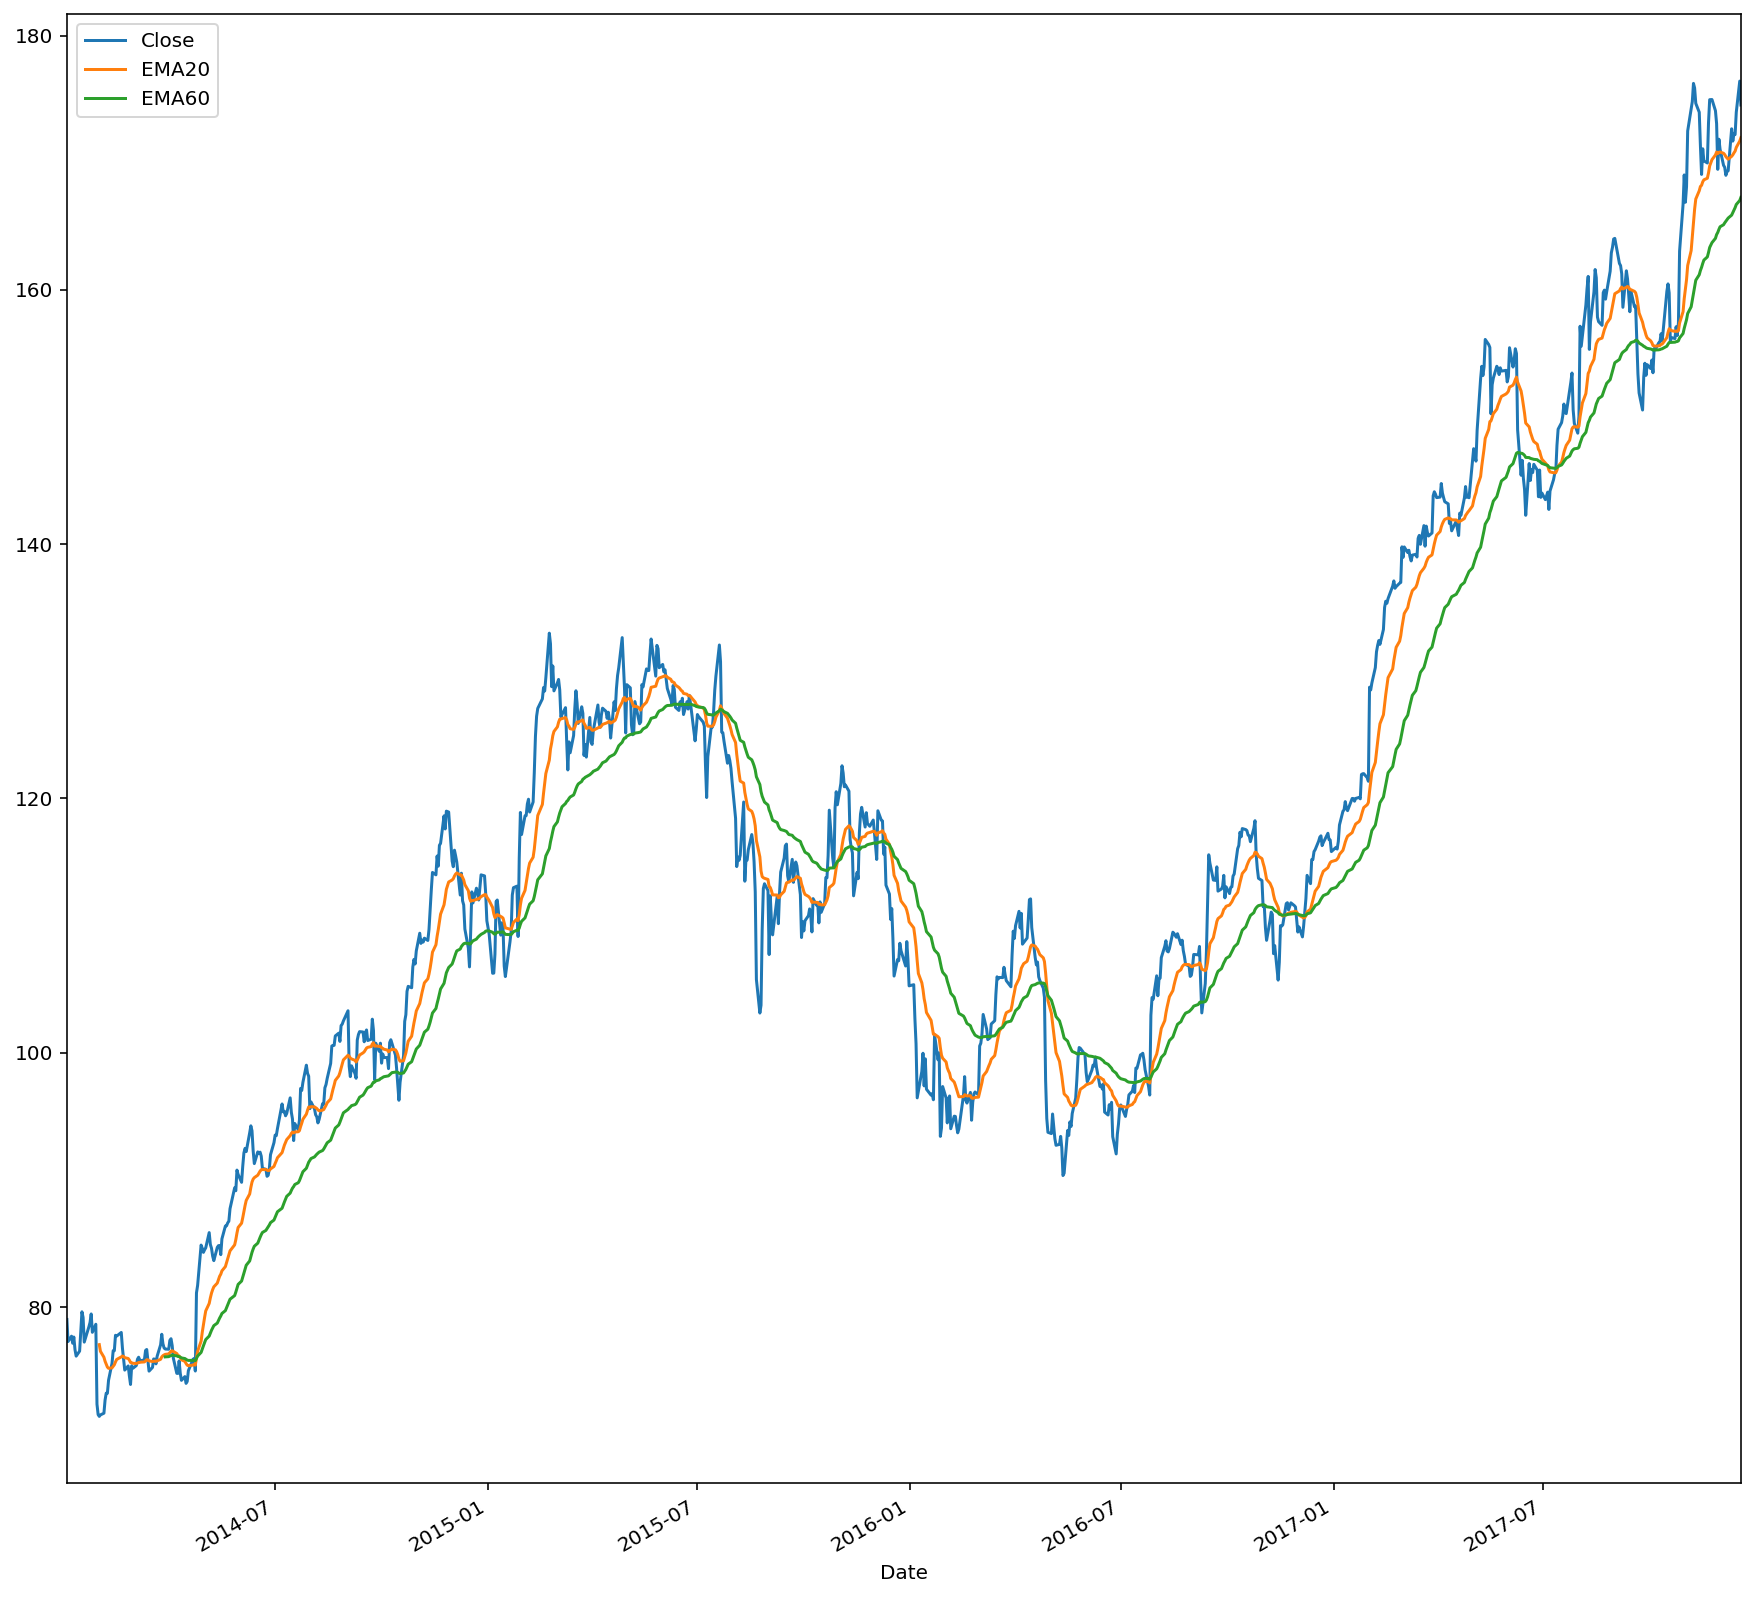

In [103]:
AAPL[['Close','EMA20','EMA60']].iloc[:1000].plot()

In [104]:
# Download the data using Quandl

df_quandl = quandl.get(dataset='WIKI/AAPL', start_date='2000-01-01',
end_date='2010-12-31')

In [105]:
df_quandl

Open    High     Low   Close     Volume  Ex-Dividend  \
Date                                                                   
2000-01-03  104.8700  112.50  101.69  111.94  4783900.0          0.0   
2000-01-04  108.2500  110.62  101.19  102.50  4574800.0          0.0   
2000-01-05  103.7500  110.56  103.00  104.00  6949300.0          0.0   
2000-01-06  106.1200  107.00   95.00   95.00  6856900.0          0.0   
2000-01-07   96.5000  101.00   95.50   99.50  4113700.0          0.0   
...              ...     ...     ...     ...        ...          ...   
2010-12-27  322.8519  325.44  321.52  324.68  8922000.0          0.0   
2010-12-28  325.9102  326.66  325.06  325.47  6283000.0          0.0   
2010-12-29  326.2200  326.45  325.10  325.29  5826400.0          0.0   
2010-12-30  325.4800  325.51  323.05  323.66  5624800.0          0.0   
2010-12-31  322.9500  323.48  321.31  322.56  6911000.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2000-01-03          1.0   3.369314   3.614454   3.267146    3.596463   
2000-01-04          1.0   3.477908   3.554053   3.251081    3.293170   
2000-01-05          1.0   3.333330   3.552125   3.309234    3.341362   
2000-01-06          1.0   3.409475   3.437748   3.052206    3.052206   
2000-01-07          1.0   3.100399   3.244977   3.068270    3.196784   
...                 ...        ...        ...        ...         ...   
2010-12-27          1.0  41.490969  41.823576  41.319801   41.725905   
2010-12-28          1.0  41.884003  41.980363  41.774741   41.827431   
2010-12-29          1.0  41.923817  41.953375  41.779881   41.804299   
2010-12-30          1.0  41.828716  41.832572  41.516428   41.594821   
2010-12-31          1.0  41.503576  41.571689  41.292813   41.453456   

            Adj. Volume  
Date                     
2000-01-03  133949200.0  
2000-01-04  128094400.0  
2000-01-05  194580400.0  
2000-01-06  191993200.0  
2000-01-07  115183600.0  
...                 ...  
2010-12-27   62454000.0  
2010-12-28   43981000.0  
2010-12-29   40784800.0  
2010-12-30   39373600.0  
2010-12-31   48377000.0  

[2767 rows x 12 columns]

In [106]:
# Request the data using intrinio
r = security_api.get_security_stock_prices(identifier='AAPL', start_date='2000-01-01',
end_date='2010-12-31', frequency='daily', page_size=10000)

In [107]:
response_list = [x.to_dict() for x in r.stock_prices]
df_intrinio = pd.DataFrame(response_list).sort_values('date')
df_intrinio.set_index('date', inplace=True)

In [108]:
df_intrinio

intraperiod frequency    open    high     low   close     volume  \
date                                                                           
2000-01-03        False     daily  104.87  112.50  101.69  111.94  4783900.0   
2000-01-04        False     daily  108.25  110.62  101.19  102.50  4574800.0   
2000-01-05        False     daily  103.75  110.56  103.00  104.00  6949300.0   
2000-01-06        False     daily  106.12  107.00   95.00   95.00  6856900.0   
2000-01-07        False     daily   96.50  101.00   95.50   99.50  4113700.0   
...                 ...       ...     ...     ...     ...     ...        ...   
2010-12-27        False     daily  323.19  325.44  321.52  324.68  8921957.0   
2010-12-28        False     daily  326.00  326.66  325.06  325.47  6282971.0   
2010-12-29        False     daily  326.30  326.45  325.10  325.29  5831096.0   
2010-12-30        False     daily  325.40  325.51  323.05  323.66  5630713.0   
2010-12-31        False     daily  323.00  323.48  321.31  322.56  6916261.0   

             adj_open   adj_high    adj_low  adj_close   adj_volume  
date                                                                 
2000-01-03   3.251121   3.487662   3.152537   3.470302  133949200.0  
2000-01-04   3.355906   3.429380   3.137036   3.177648  128094400.0  
2000-01-05   3.216400   3.427520   3.193149   3.224150  194580400.0  
2000-01-06   3.289873   3.317154   2.945137   2.945137  191993200.0  
2000-01-07   2.991639   3.131146   2.960638   3.084644  115183600.0  
...               ...        ...        ...        ...          ...  
2010-12-27  40.077427  40.356440  39.870337  40.262195   62453699.0  
2010-12-28  40.425883  40.507727  40.309317  40.360160   43980797.0  
2010-12-29  40.463085  40.481685  40.314278  40.337839   40817672.0  
2010-12-30  40.351479  40.365120  40.060066  40.135709   39414991.0  
2010-12-31  40.053865  40.113388  39.844296  39.999303   48413827.0  

[2770 rows x 12 columns]

In [134]:
# Converting prices to returns

df = yf.download('AAPL', start='2000-01-01',
end='2010-12-31', progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df

adj_close
Date                 
1999-12-31   3.187337
2000-01-03   3.470226
2000-01-04   3.177650
2000-01-05   3.224152
2000-01-06   2.945139
...               ...
2010-12-23  40.128281
2010-12-27  40.262222
2010-12-28  40.360180
2010-12-29  40.337868
2010-12-30  40.135727

[2767 rows x 1 columns]

In [135]:
# Calculate the simple and log returns using the adjusted close prices

df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df

adj_close  simple_rtn   log_rtn
Date                                       
1999-12-31   3.187337         NaN       NaN
2000-01-03   3.470226    0.088754  0.085034
2000-01-04   3.177650   -0.084310 -0.088078
2000-01-05   3.224152    0.014634  0.014528
2000-01-06   2.945139   -0.086538 -0.090514
...               ...         ...       ...
2010-12-23  40.128281   -0.004798 -0.004809
2010-12-27  40.262222    0.003338  0.003332
2010-12-28  40.360180    0.002433  0.002430
2010-12-29  40.337868   -0.000553 -0.000553
2010-12-30  40.135727   -0.005011 -0.005024

[2767 rows x 3 columns]

In [131]:
# Adding inflation in the returns series

## Create a DataFrame with all possible dates, and left join the prices to it

df_all_dates = pd.DataFrame(index = pd.date_range(start = '1999-12-31', end = '2010-12-31'))
df = df_all_dates.join(df[['adj_close']], how = 'left').fillna(method = 'ffill').asfreq('M')

## Download the inflation data from Quandl

df_cpi = quandl.get(dataset = 'RATEINF/CPI_USA', start_date = '1999-12-01', end_date = '2010-12-31')
df_cpi.rename(columns={'Value':'cpi'}, inplace=True)

## Merge the inflation data to the prices

df_merged = df.join(df_cpi, how='left')

## Calculate the simple returns and inflation rate

df_merged['simple_rtn'] = df_merged.adj_close.pct_change()
df_merged['inflation_rate'] = df_merged.cpi.pct_change()

## Adjust the returns for inflation

df_merged['real_rtn'] = (df_merged.simple_rtn + 1) / (df_merged.inflation_rate + 1) - 1

df_merged


adj_close      cpi  simple_rtn  inflation_rate  real_rtn
1999-12-31   3.187337  168.300         NaN             NaN       NaN
2000-01-31   3.216401  168.800    0.009119        0.002971  0.006130
2000-02-29   3.553542  169.800    0.104819        0.005924  0.098313
2000-03-31   4.210384  171.200    0.184841        0.008245  0.175152
2000-04-30   3.846120  171.300   -0.086516        0.000584 -0.087049
...               ...      ...         ...             ...       ...
2010-08-31  30.145821  218.312   -0.055005        0.001381 -0.056308
2010-09-30  35.186657  218.439    0.167215        0.000582  0.166536
2010-10-31  37.323280  218.711    0.060723        0.001245  0.059403
2010-11-30  38.584427  218.803    0.033790        0.000421  0.033355
2010-12-31  40.135727  219.179    0.040205        0.001718  0.038421

[133 rows x 5 columns]

In [136]:
df.head()

adj_close  simple_rtn   log_rtn
Date                                       
1999-12-31   3.187337         NaN       NaN
2000-01-03   3.470226    0.088754  0.085034
2000-01-04   3.177650   -0.084310 -0.088078
2000-01-05   3.224152    0.014634  0.014528
2000-01-06   2.945139   -0.086538 -0.090514

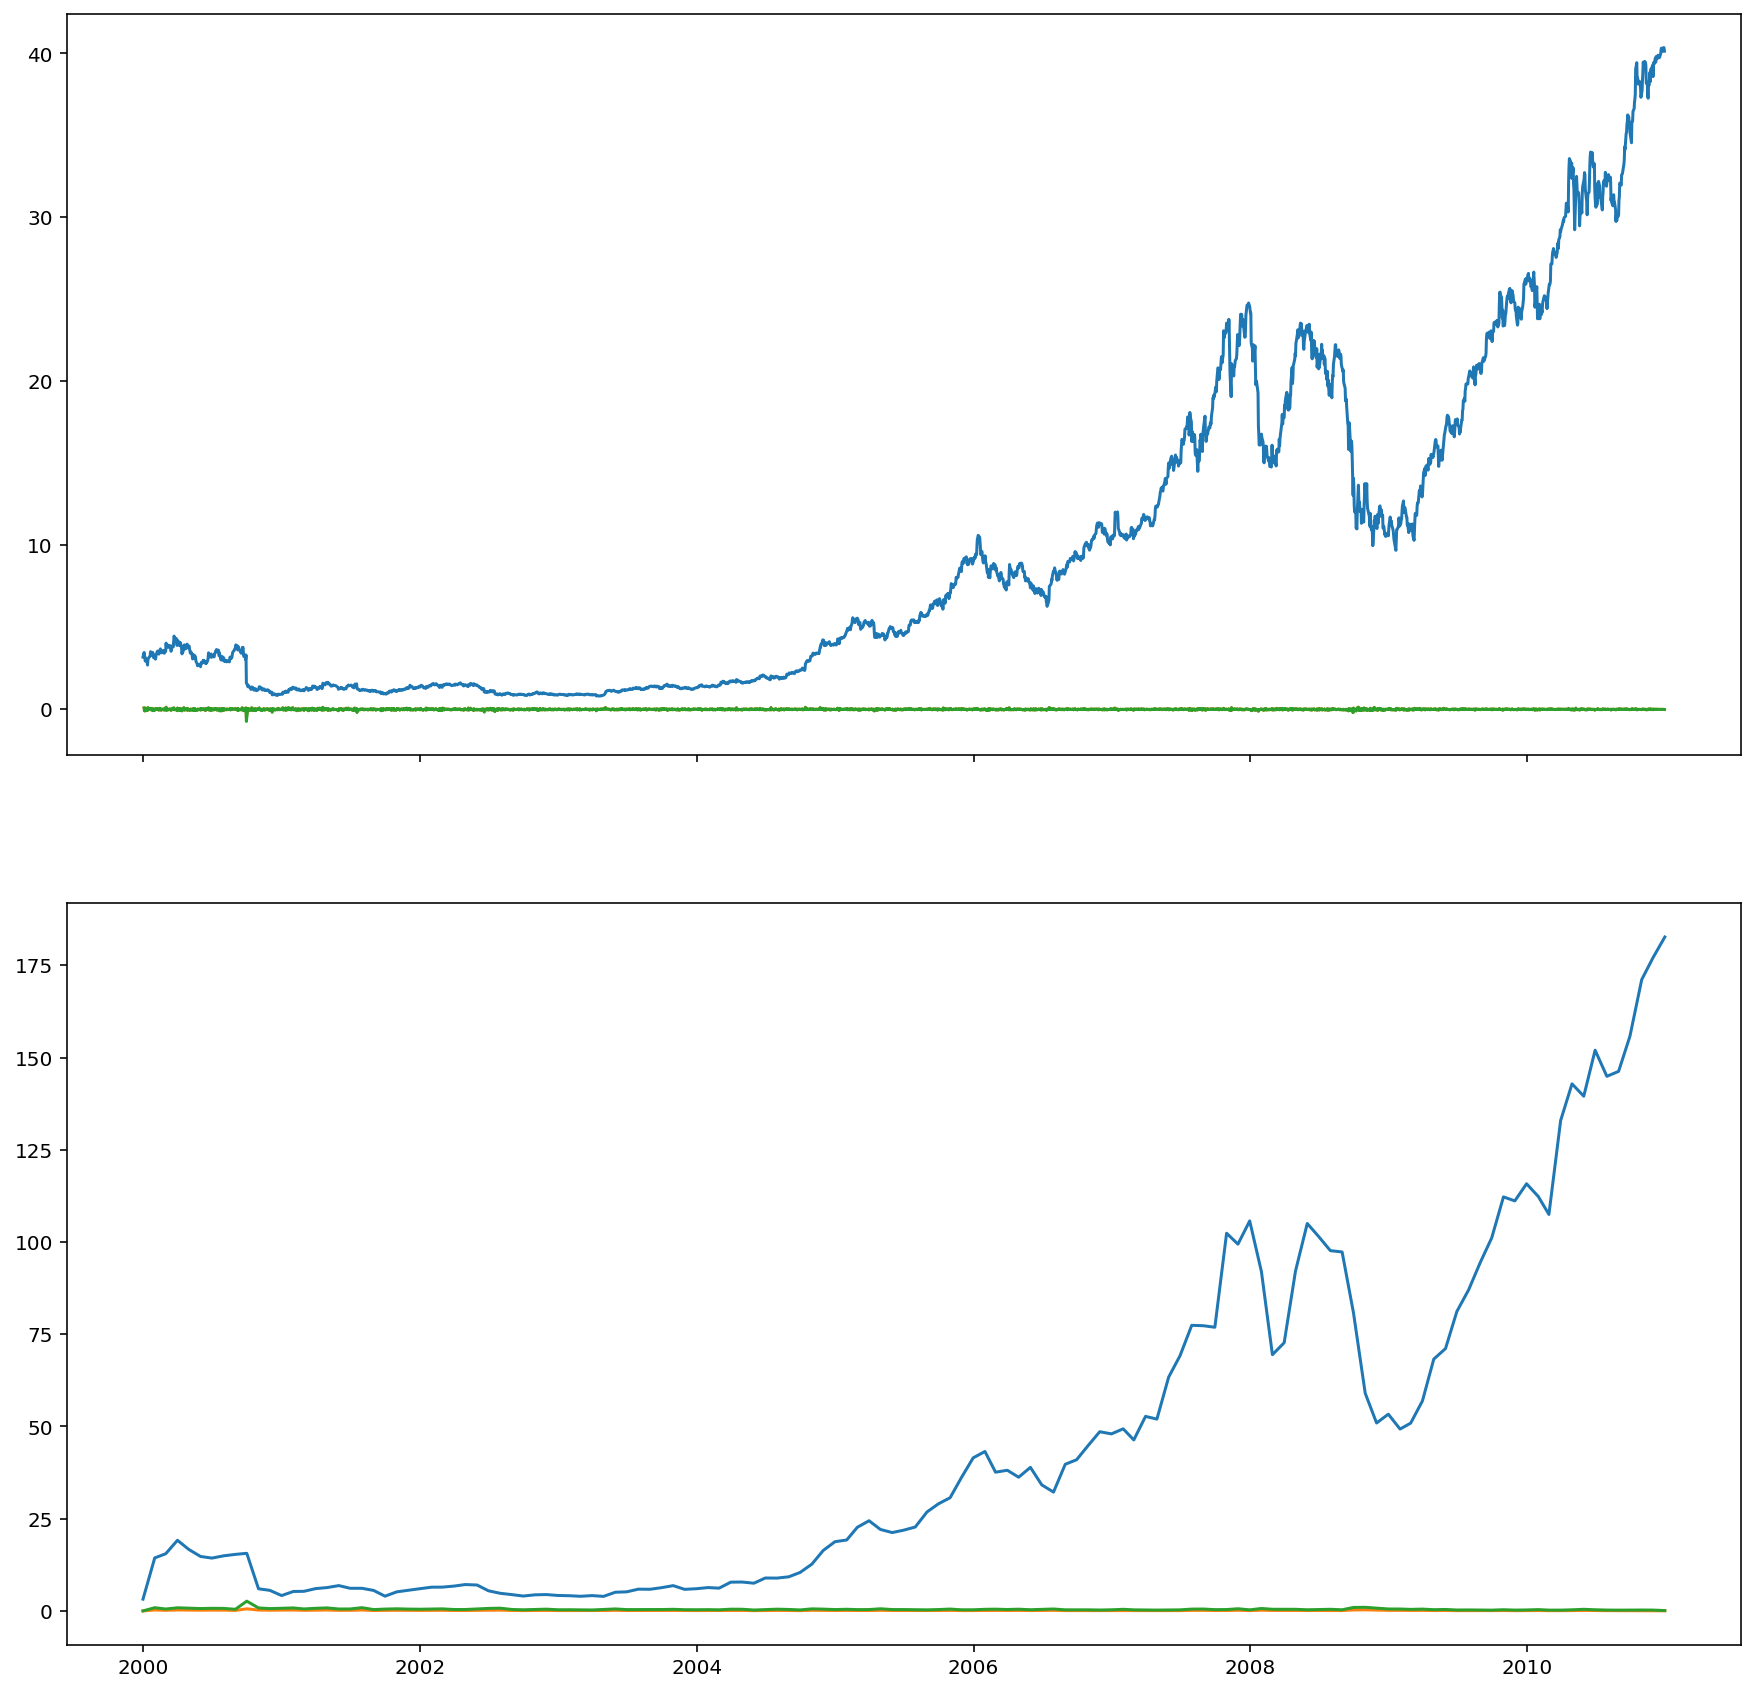

In [137]:
# Changing frequency

## Define the function for calculating the realized volatility

def realized_volatility(x): 
    return np.sqrt(np.sum(x**2))

## Calculate the monthly realized volatility

df_rv = df.groupby(pd.Grouper(freq = 'M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace = True)

## Annualize the values

df_rv.rv = df_rv.rv * np.sqrt(12)

## Plot the results

fig, ax = plt.subplots(2, 1, sharex = True) 
ax[0].plot(df)
ax[1].plot(df_rv)

[Text(0, 0.5, 'Log returns (%)'), Text(0.5, 0, 'Date')]

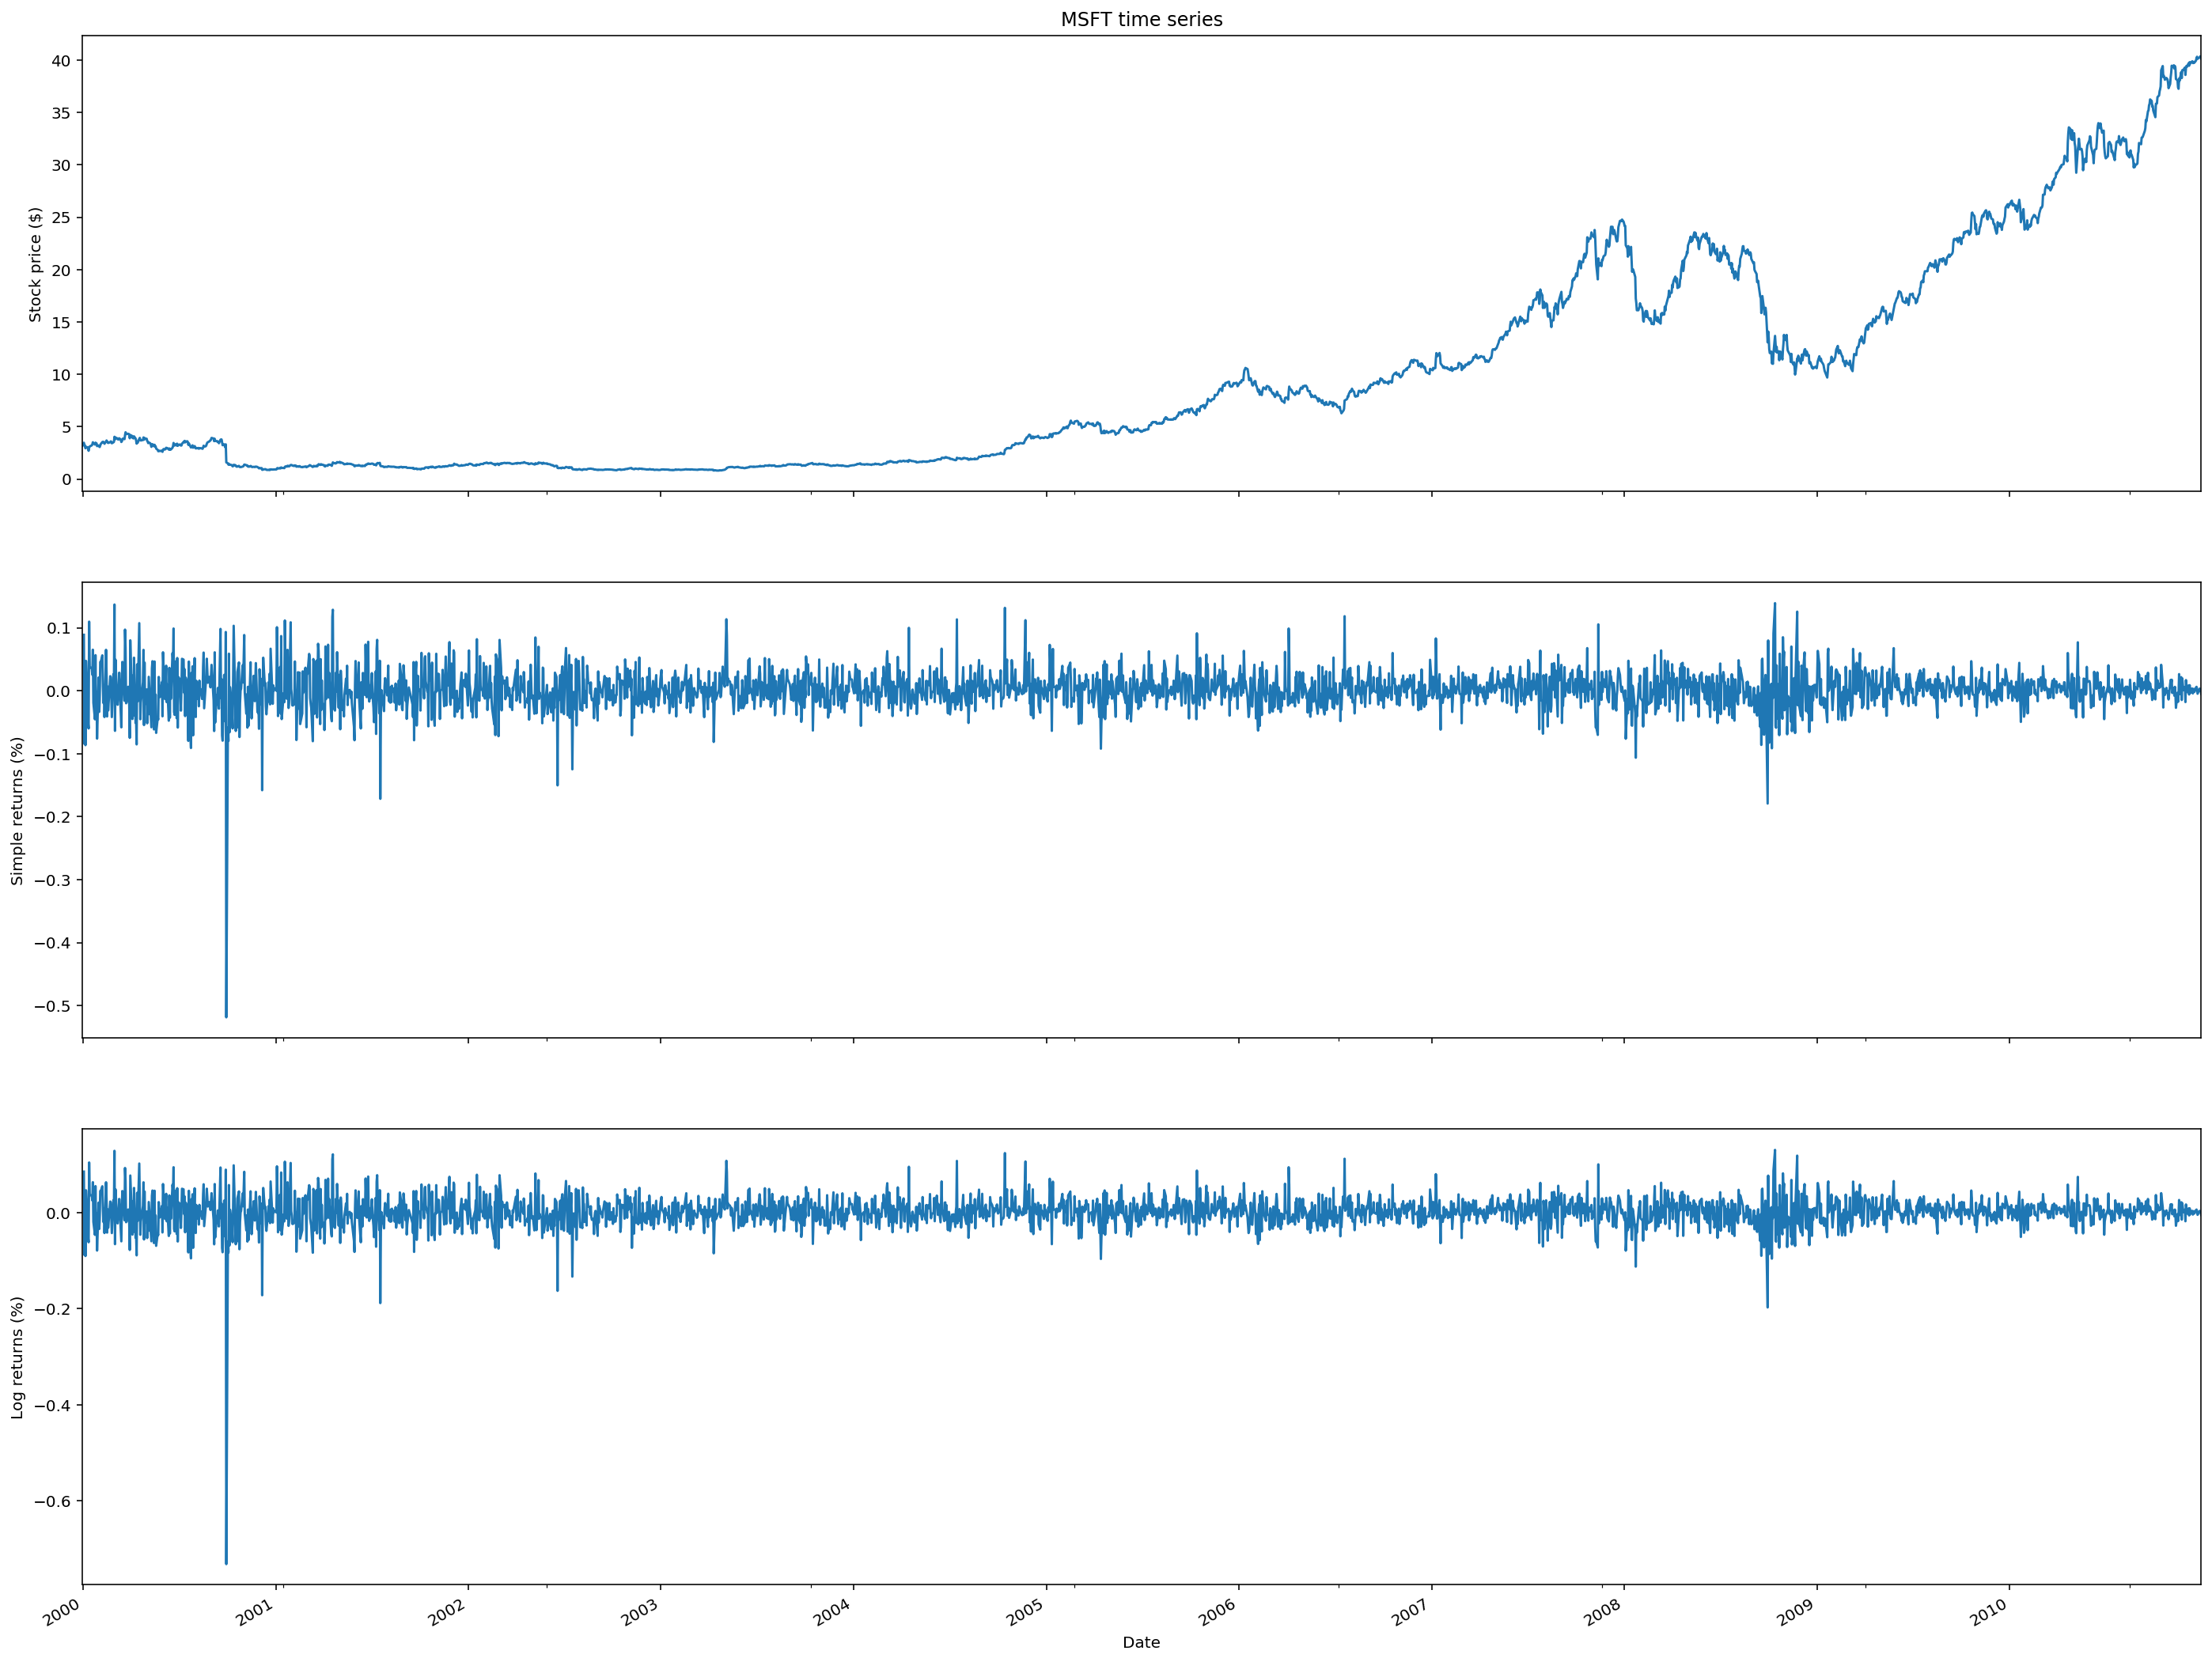

In [138]:
fig, ax = plt.subplots(3, 1, figsize=(24, 20), sharex=True)
df.adj_close.plot(ax = ax[0]) 
ax[0].set(title = 'MSFT time series',
ylabel = 'Stock price ($)') 
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')
df.log_rtn.plot(ax = ax[2]) 
ax[2].set(xlabel = 'Date',
ylabel = 'Log returns (%)')

In [139]:
    df.iplot(subplots = True, shape = (3,1), shared_xaxes = True, title = 'MSFT time series', kind = 'line')

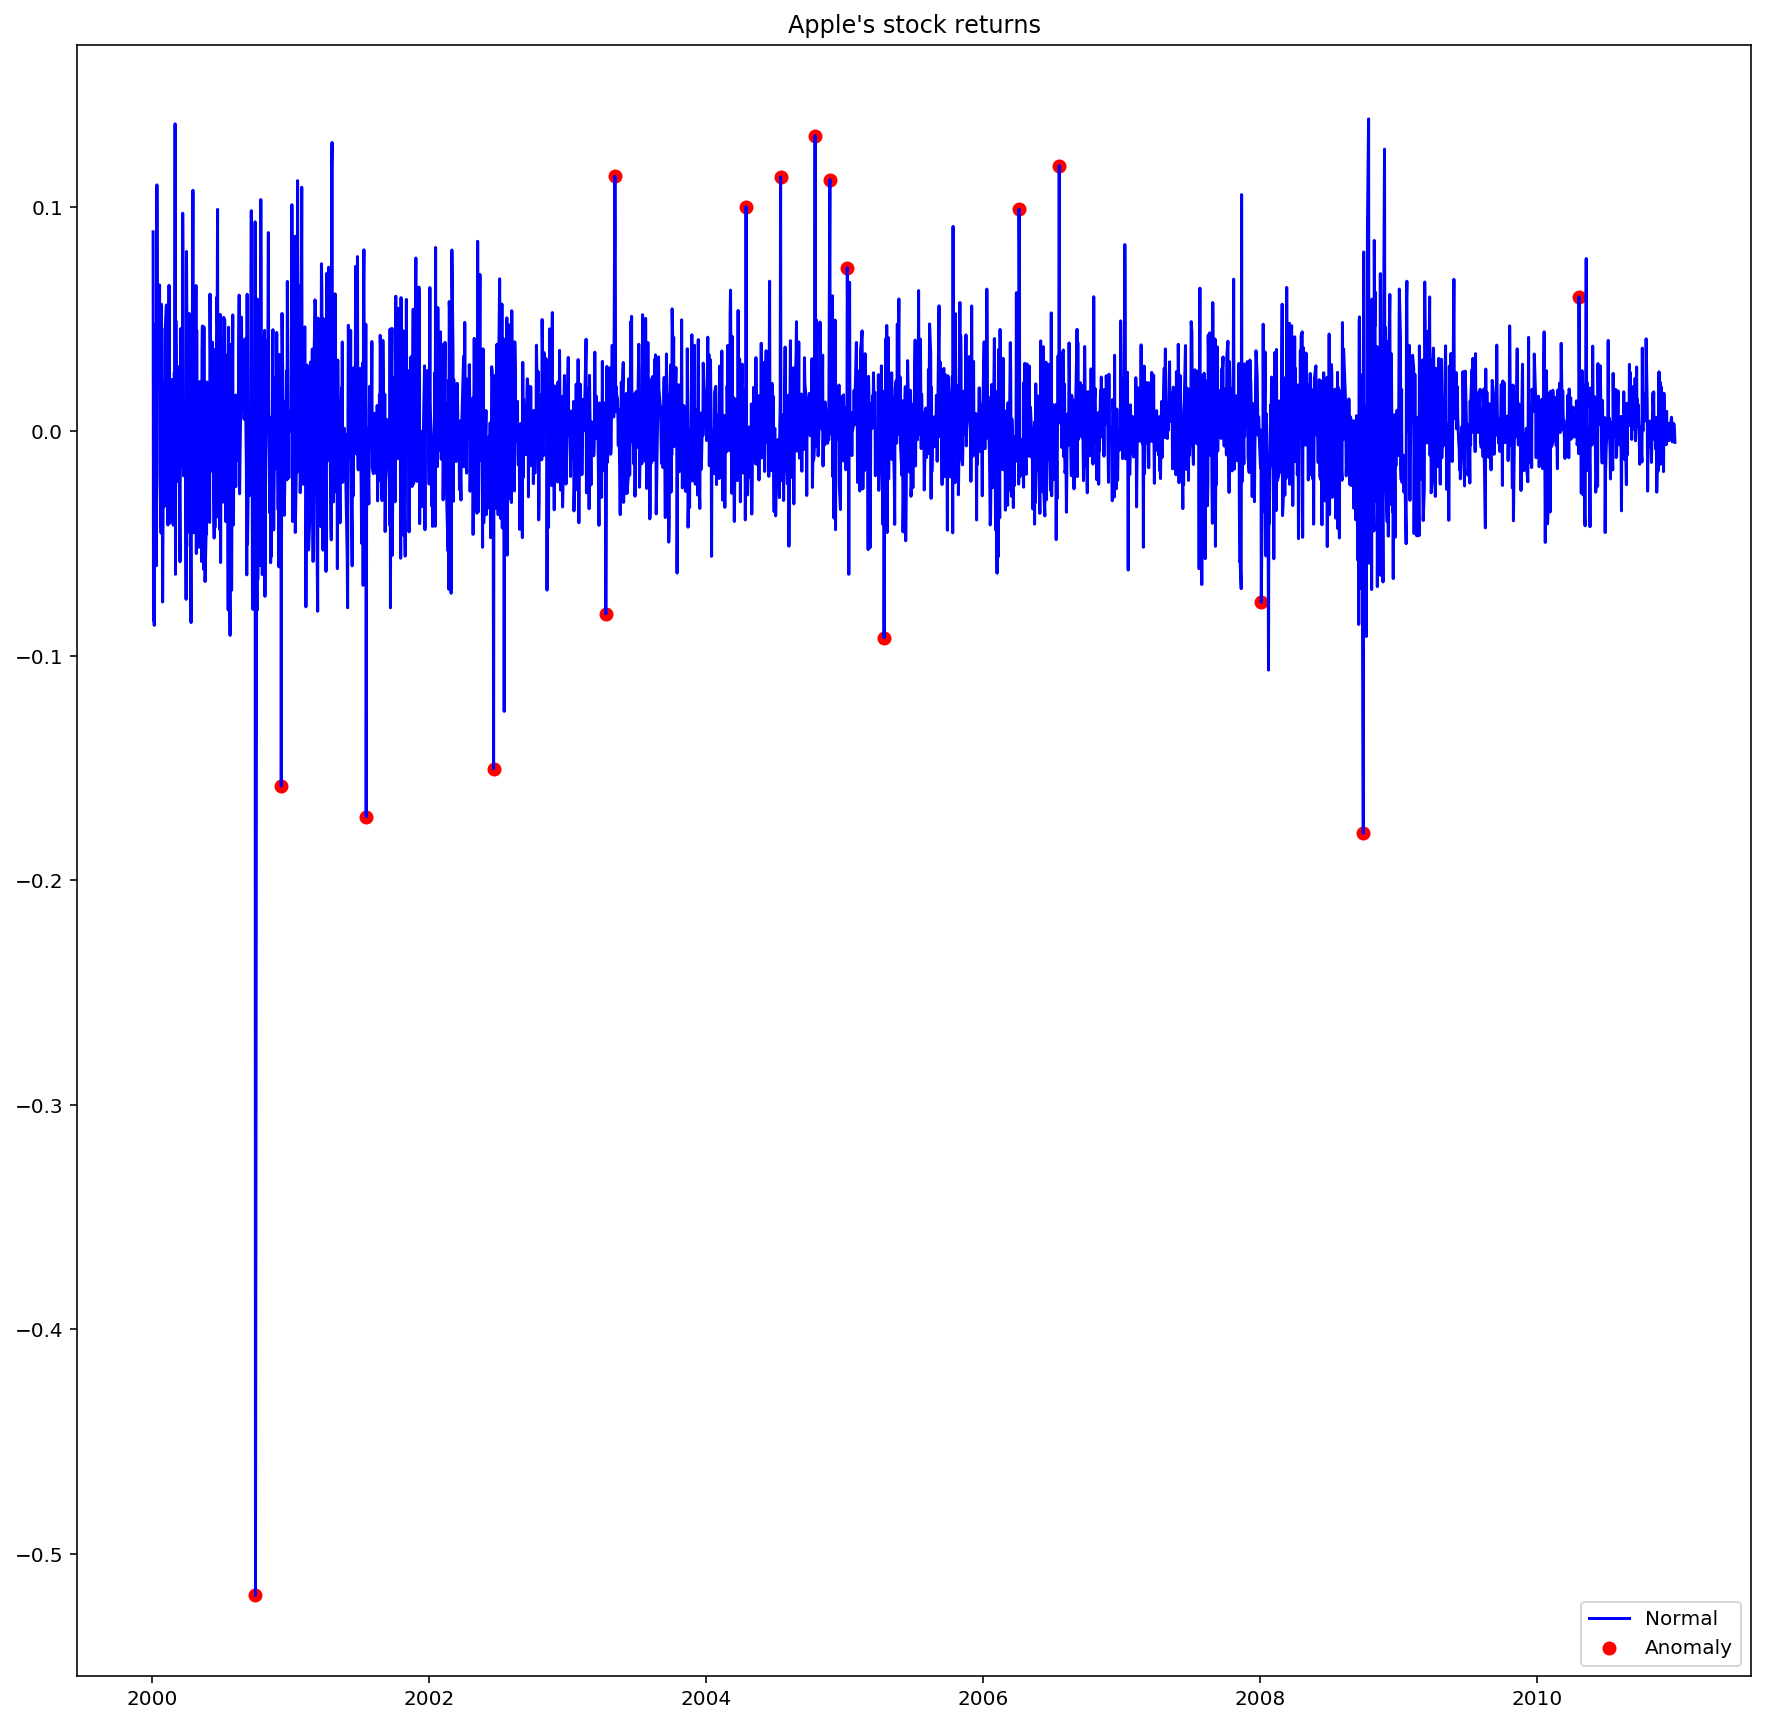

In [140]:
# Identifying outliers

## Calculate the rolling mean and standard deviation

df_rolling = df[['simple_rtn']].rolling(window = 21).agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

## Join the rolling metrics to the original data

df_outliers = df.join(df_rolling)

## Define a function to detecting outliers

def indentify_outliers(row, n_sigmas = 3): 
    x = row['simple_rtn']
    mu = row['mean']
    sigma = row['std']
    
    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma): 
        return 1
    else:
        return 0
    
## Identify the outliers and extract their values for later use

df_outliers['outlier'] = df_outliers.apply(indentify_outliers, axis = 1)
outliers = df_outliers.loc[df_outliers['outlier'] == 1, ['simple_rtn']]

## Plot the results

fig, ax = plt.subplots()
ax.plot(df_outliers.index, df_outliers.simple_rtn, color = 'blue', label = 'Normal')
ax.scatter(outliers.index, outliers.simple_rtn, color = 'red', label = 'Anomaly')
ax.set_title("Apple's stock returns") 
ax.legend(loc = 'lower right')

In [203]:
# Investigating stylized facts of asset returns

df = yf.download(['^GSPC', '^VIX'], start='1985-01-01', 
                 end='2020-04-16', progress=False) 
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^GSPC': 'sp500', '^VIX': 'vix'})

df['log_rtn'] = np.log(df.sp500 / df.sp500.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1)) 
df.dropna(how='any', axis=0, inplace=True)

## Non-Gaussian distribution of returns

### Calculate the normal Probability Density Function (PDF)
### using the mean and standard deviation of the observed returns

r_range = np.linspace(np.nanmin(df.log_rtn), np.nanmax(df.log_rtn), num = 1000) 
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc = mu, scale = sigma)

Text(0.5, 1.0, 'Q-Q plot')

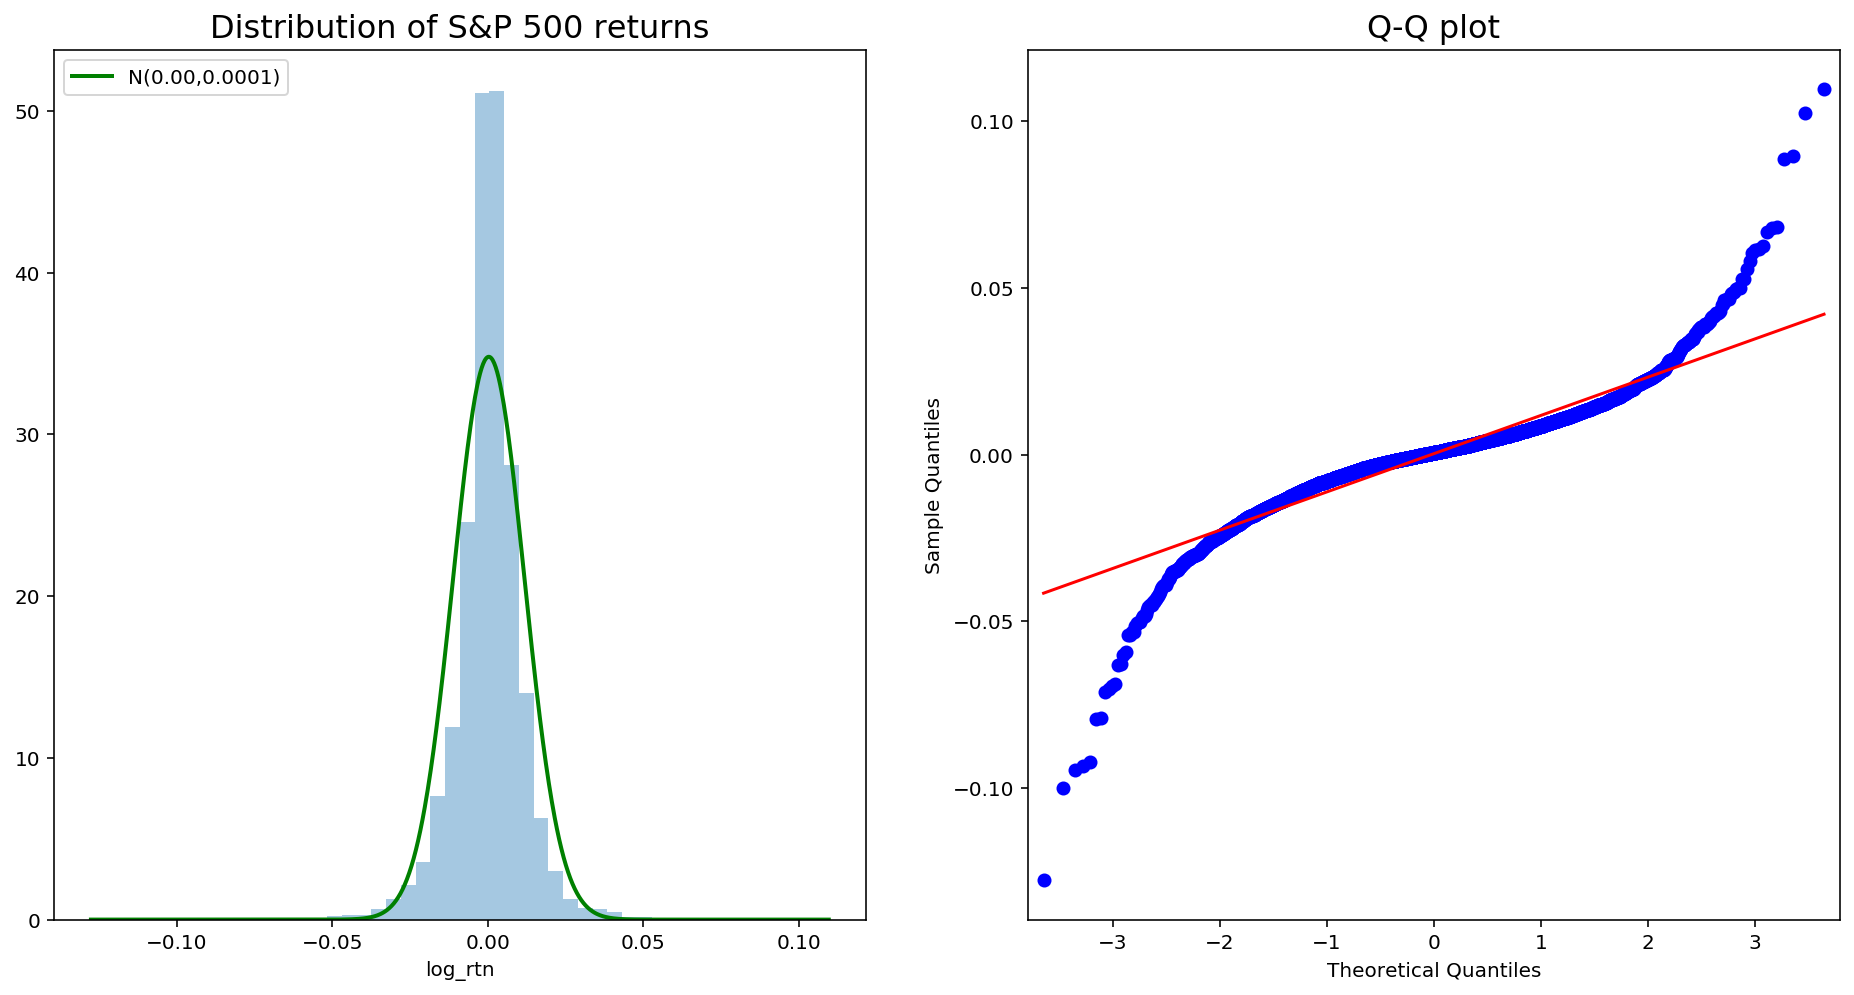

In [204]:
### Plot the histogram and the Q-Q plot

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

#### histogram

sns.distplot(df.log_rtn, kde = False, norm_hist = True, ax = ax[0])
ax[0].set_title('Distribution of S&P 500 returns', fontsize = 16)
ax[0].plot(r_range, norm_pdf, 'g', lw = 2,
           label = f'N({mu:.2f},{sigma**2:.4f})') 
ax[0].legend(loc = 'upper left');

#### Q-Q plot

qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)



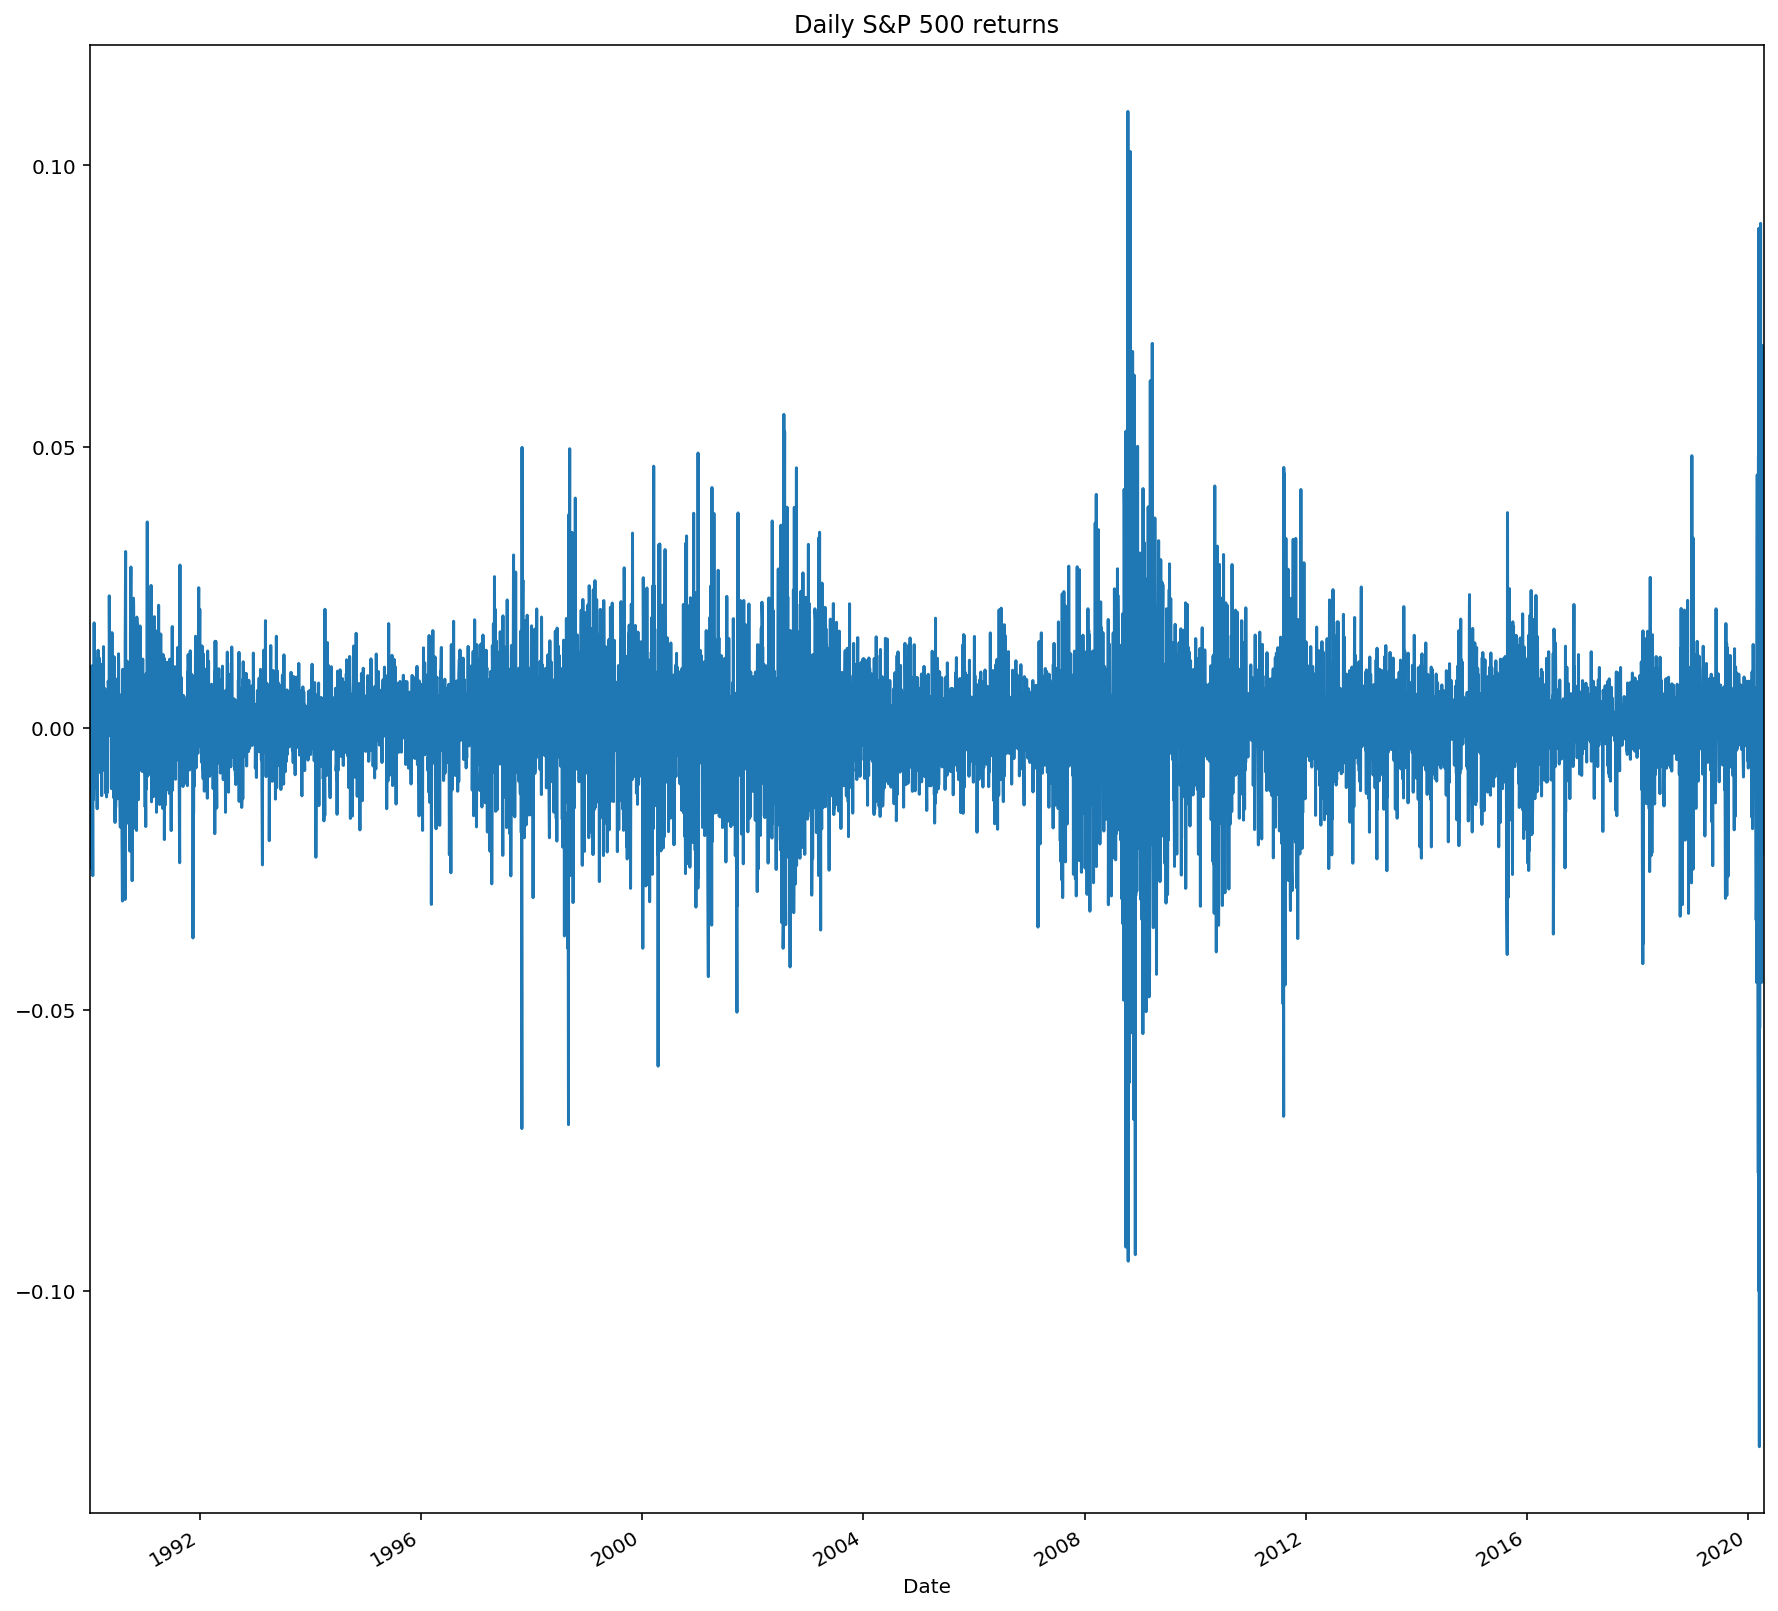

In [205]:
# Volatility clustering

## Visualize the log returns series

df.log_rtn.plot(title='Daily S&P 500 returns')

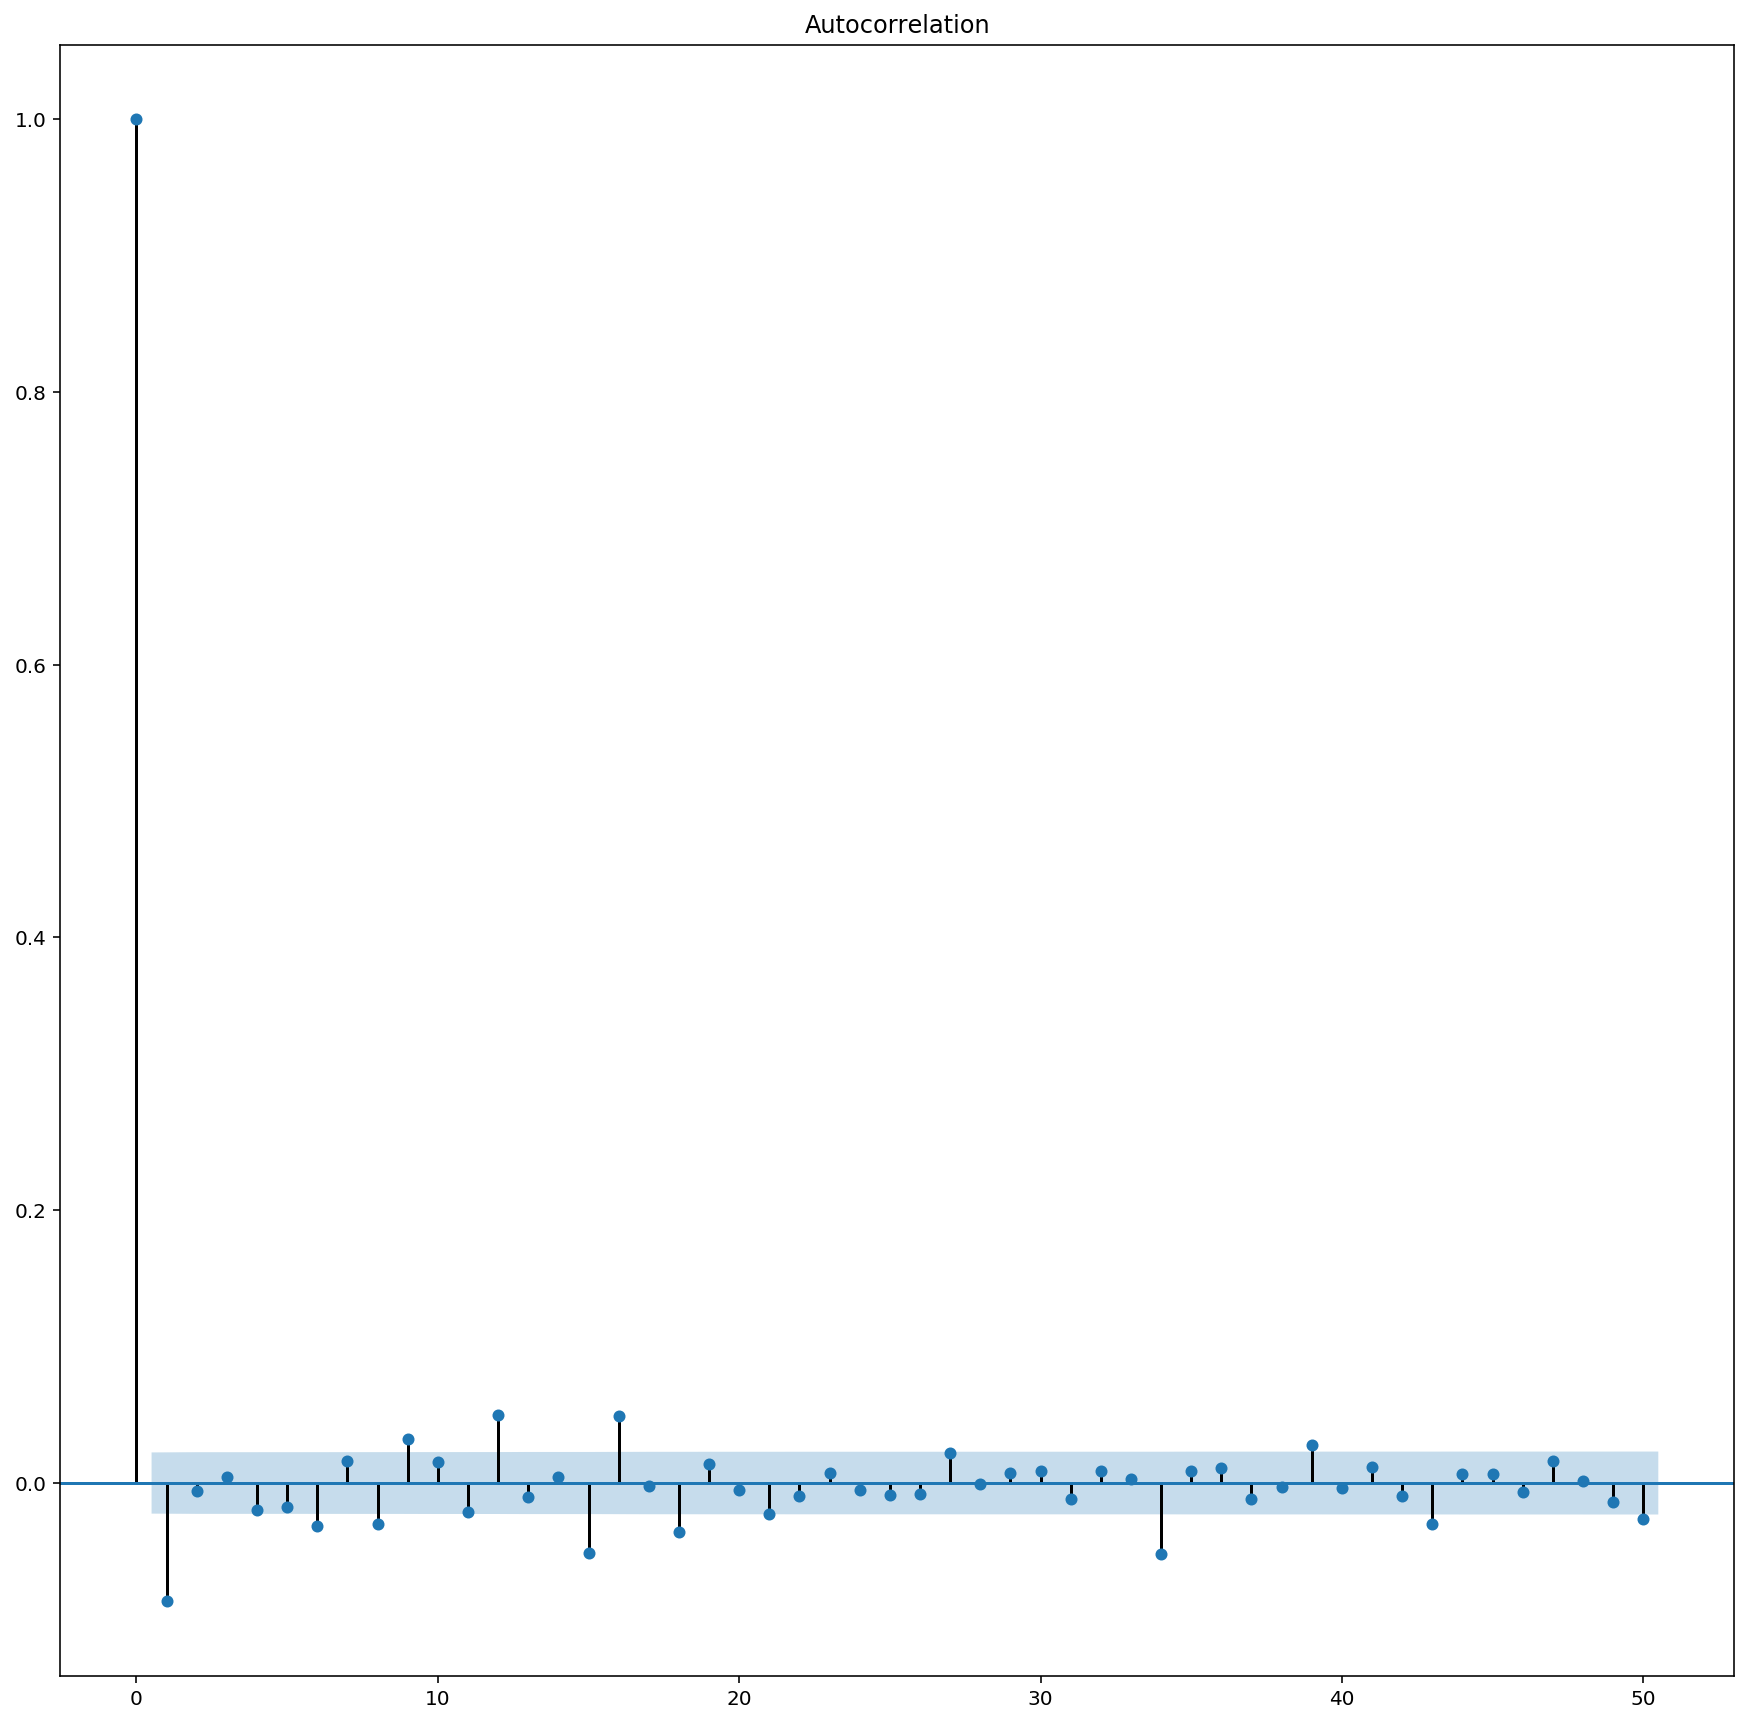

In [206]:
# Absence of autocorrelation in returns

## Define the parameters for creating the autocorrelation plots

N_LAGS = 50 
SIGNIFICANCE_LEVEL = 0.05

## Run the following code to create the autocorrelation function (ACF) plot of log returns
 
acf = smt.graphics.plot_acf(df.log_rtn, lags = N_LAGS, alpha = SIGNIFICANCE_LEVEL)

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

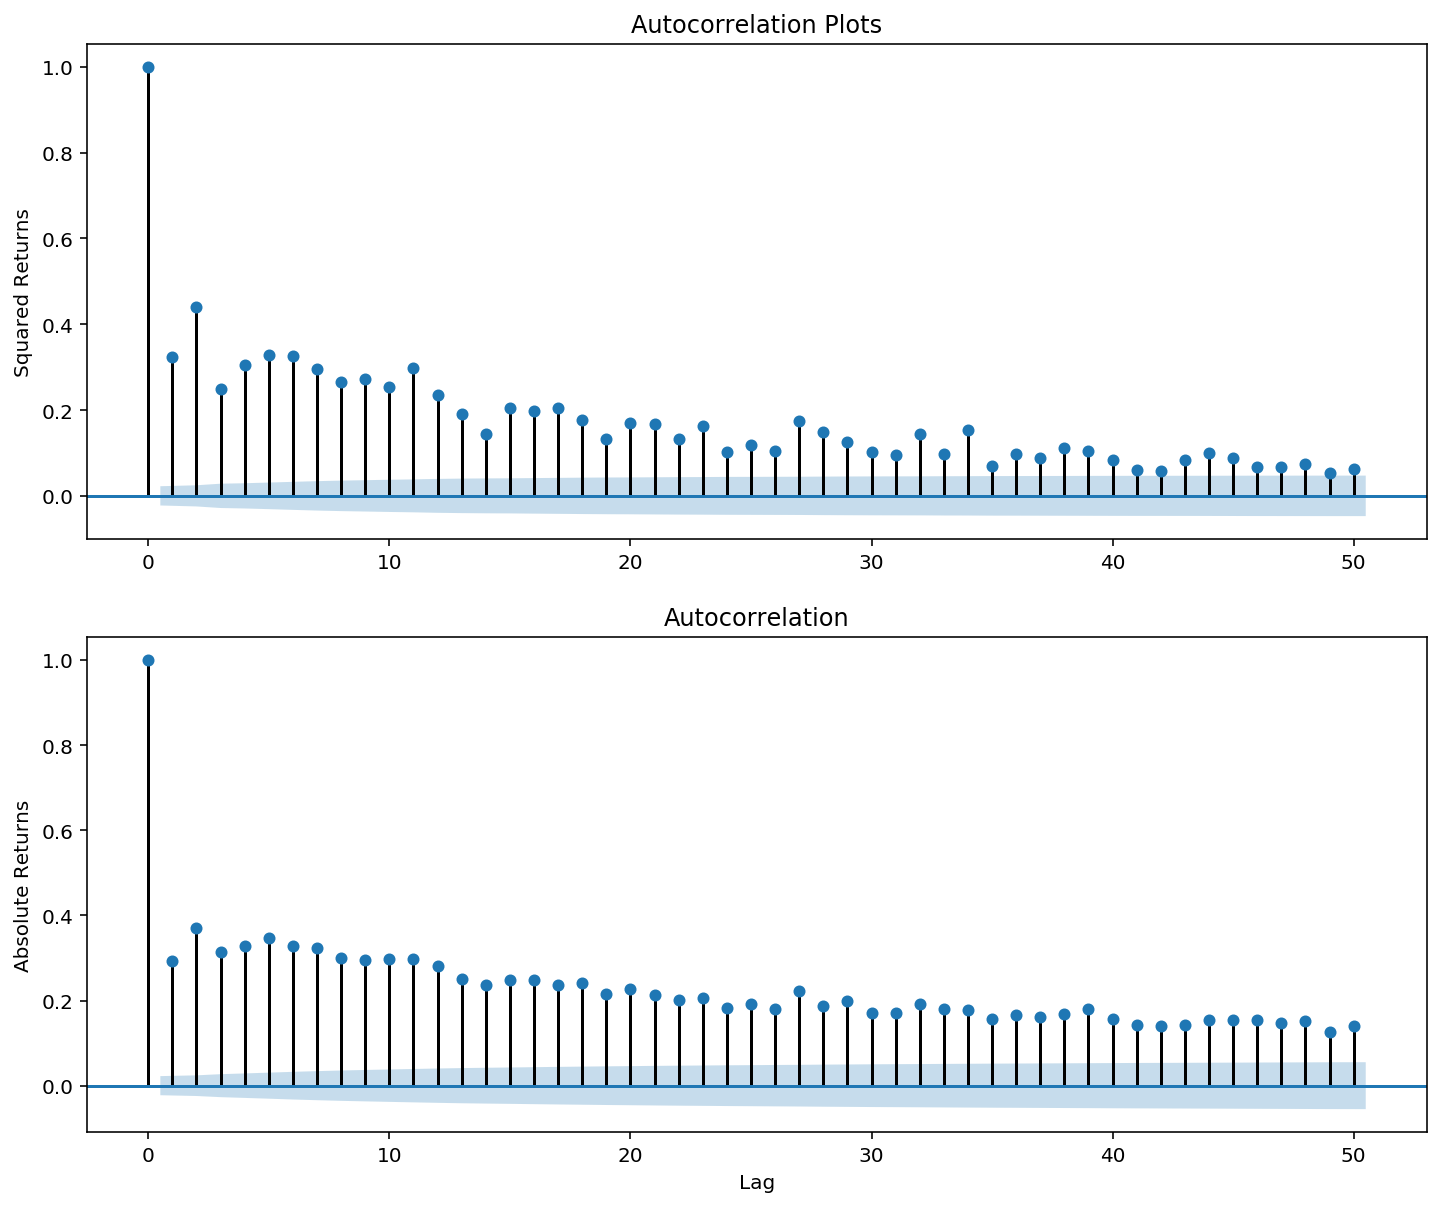

In [207]:
# Small and decreasing autocorrelation in squared/absolute returns

## Create the ACF plots

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
smt.graphics.plot_acf(df.log_rtn ** 2, lags = N_LAGS, alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title = 'Autocorrelation Plots', ylabel = 'Squared Returns')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags = N_LAGS, alpha = SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel = 'Absolute Returns', xlabel='Lag')

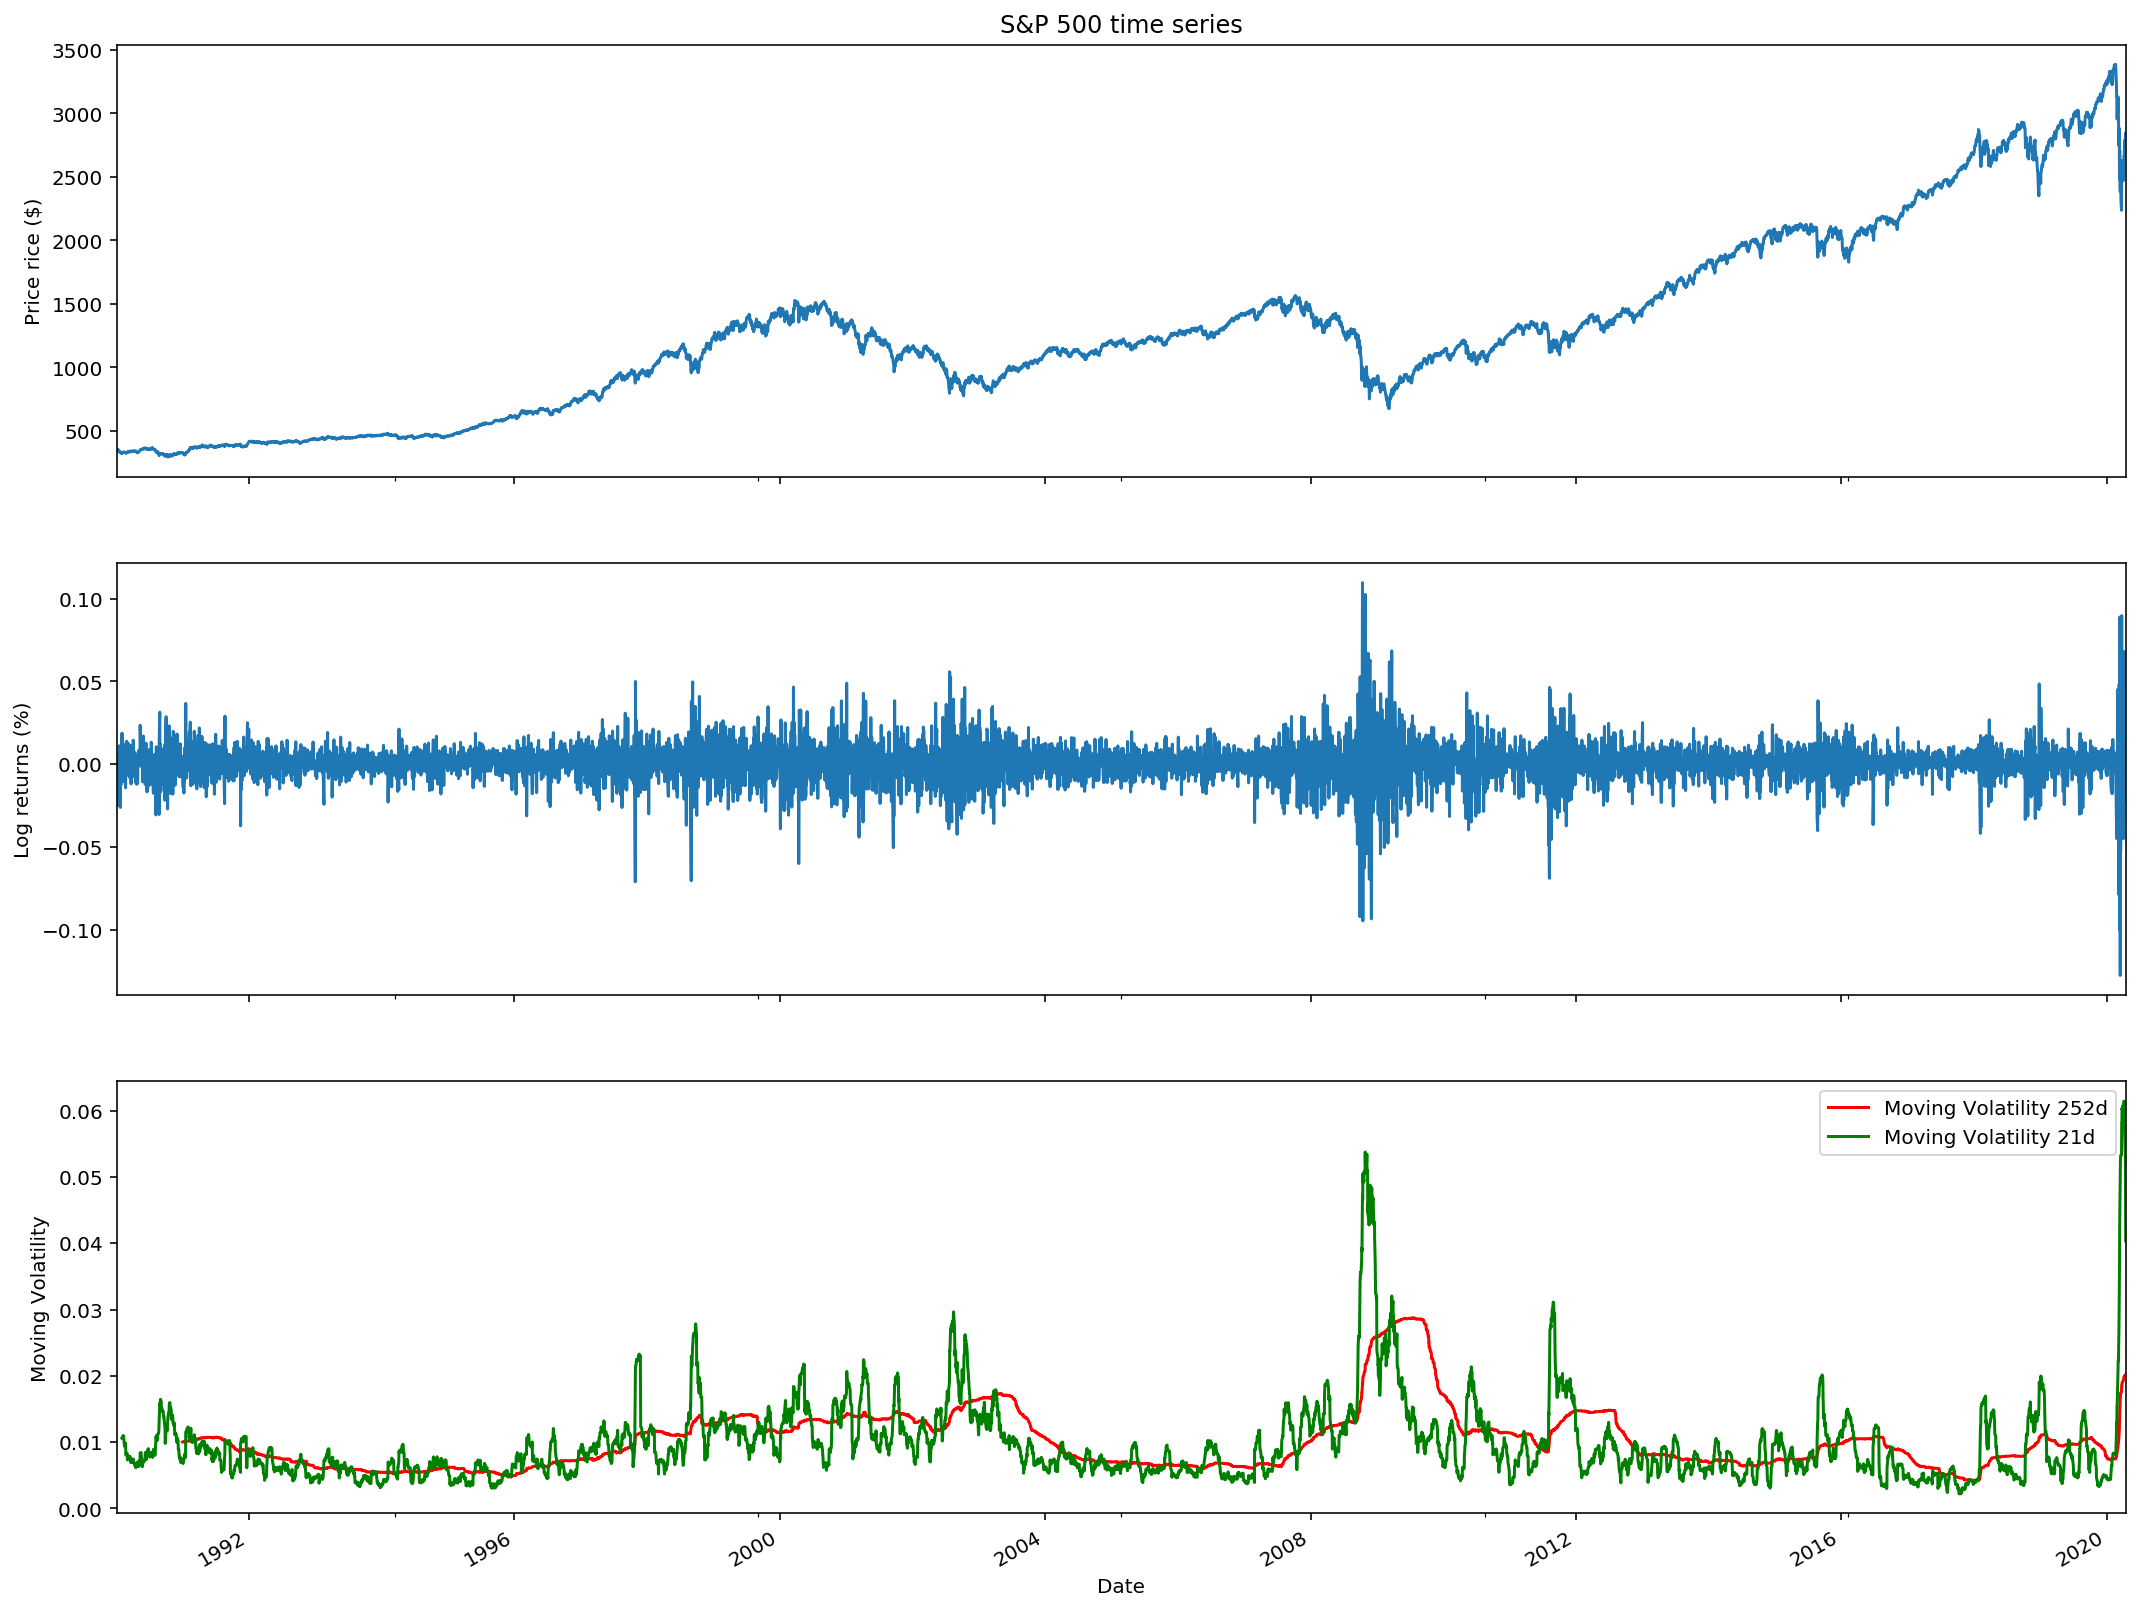

In [208]:
# Leverage effect

## Calculate volatility measures as rolling standard deviations

df['moving_std_252'] = df[['log_rtn']].rolling(window = 252).std() 
df['moving_std_21'] = df[['log_rtn']].rolling(window = 21).std()

# Plot all the series for comparison

fig, ax = plt.subplots(3, 1, figsize=(18, 15), sharex=True)
df.sp500.plot(ax = ax[0]) 
ax[0].set(title='S&P 500 time series', ylabel='Price rice ($)')
df.log_rtn.plot(ax = ax[1]) 
ax[1].set(ylabel = 'Log returns (%)')
df.moving_std_252.plot(ax = ax[2], color = 'r', 
                       label = 'Moving Volatility 252d')
df.moving_std_21.plot(ax = ax[2], color = 'g', 
                      label = 'Moving Volatility 21d')
ax[2].set(ylabel = 'Moving Volatility', xlabel = 'Date')
ax[2].legend()

[Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'S&P 500 log returns'),
 Text(0.5, 1.0, 'S&P 500 vs. VIX ($\\rho$ = -0.71)')]

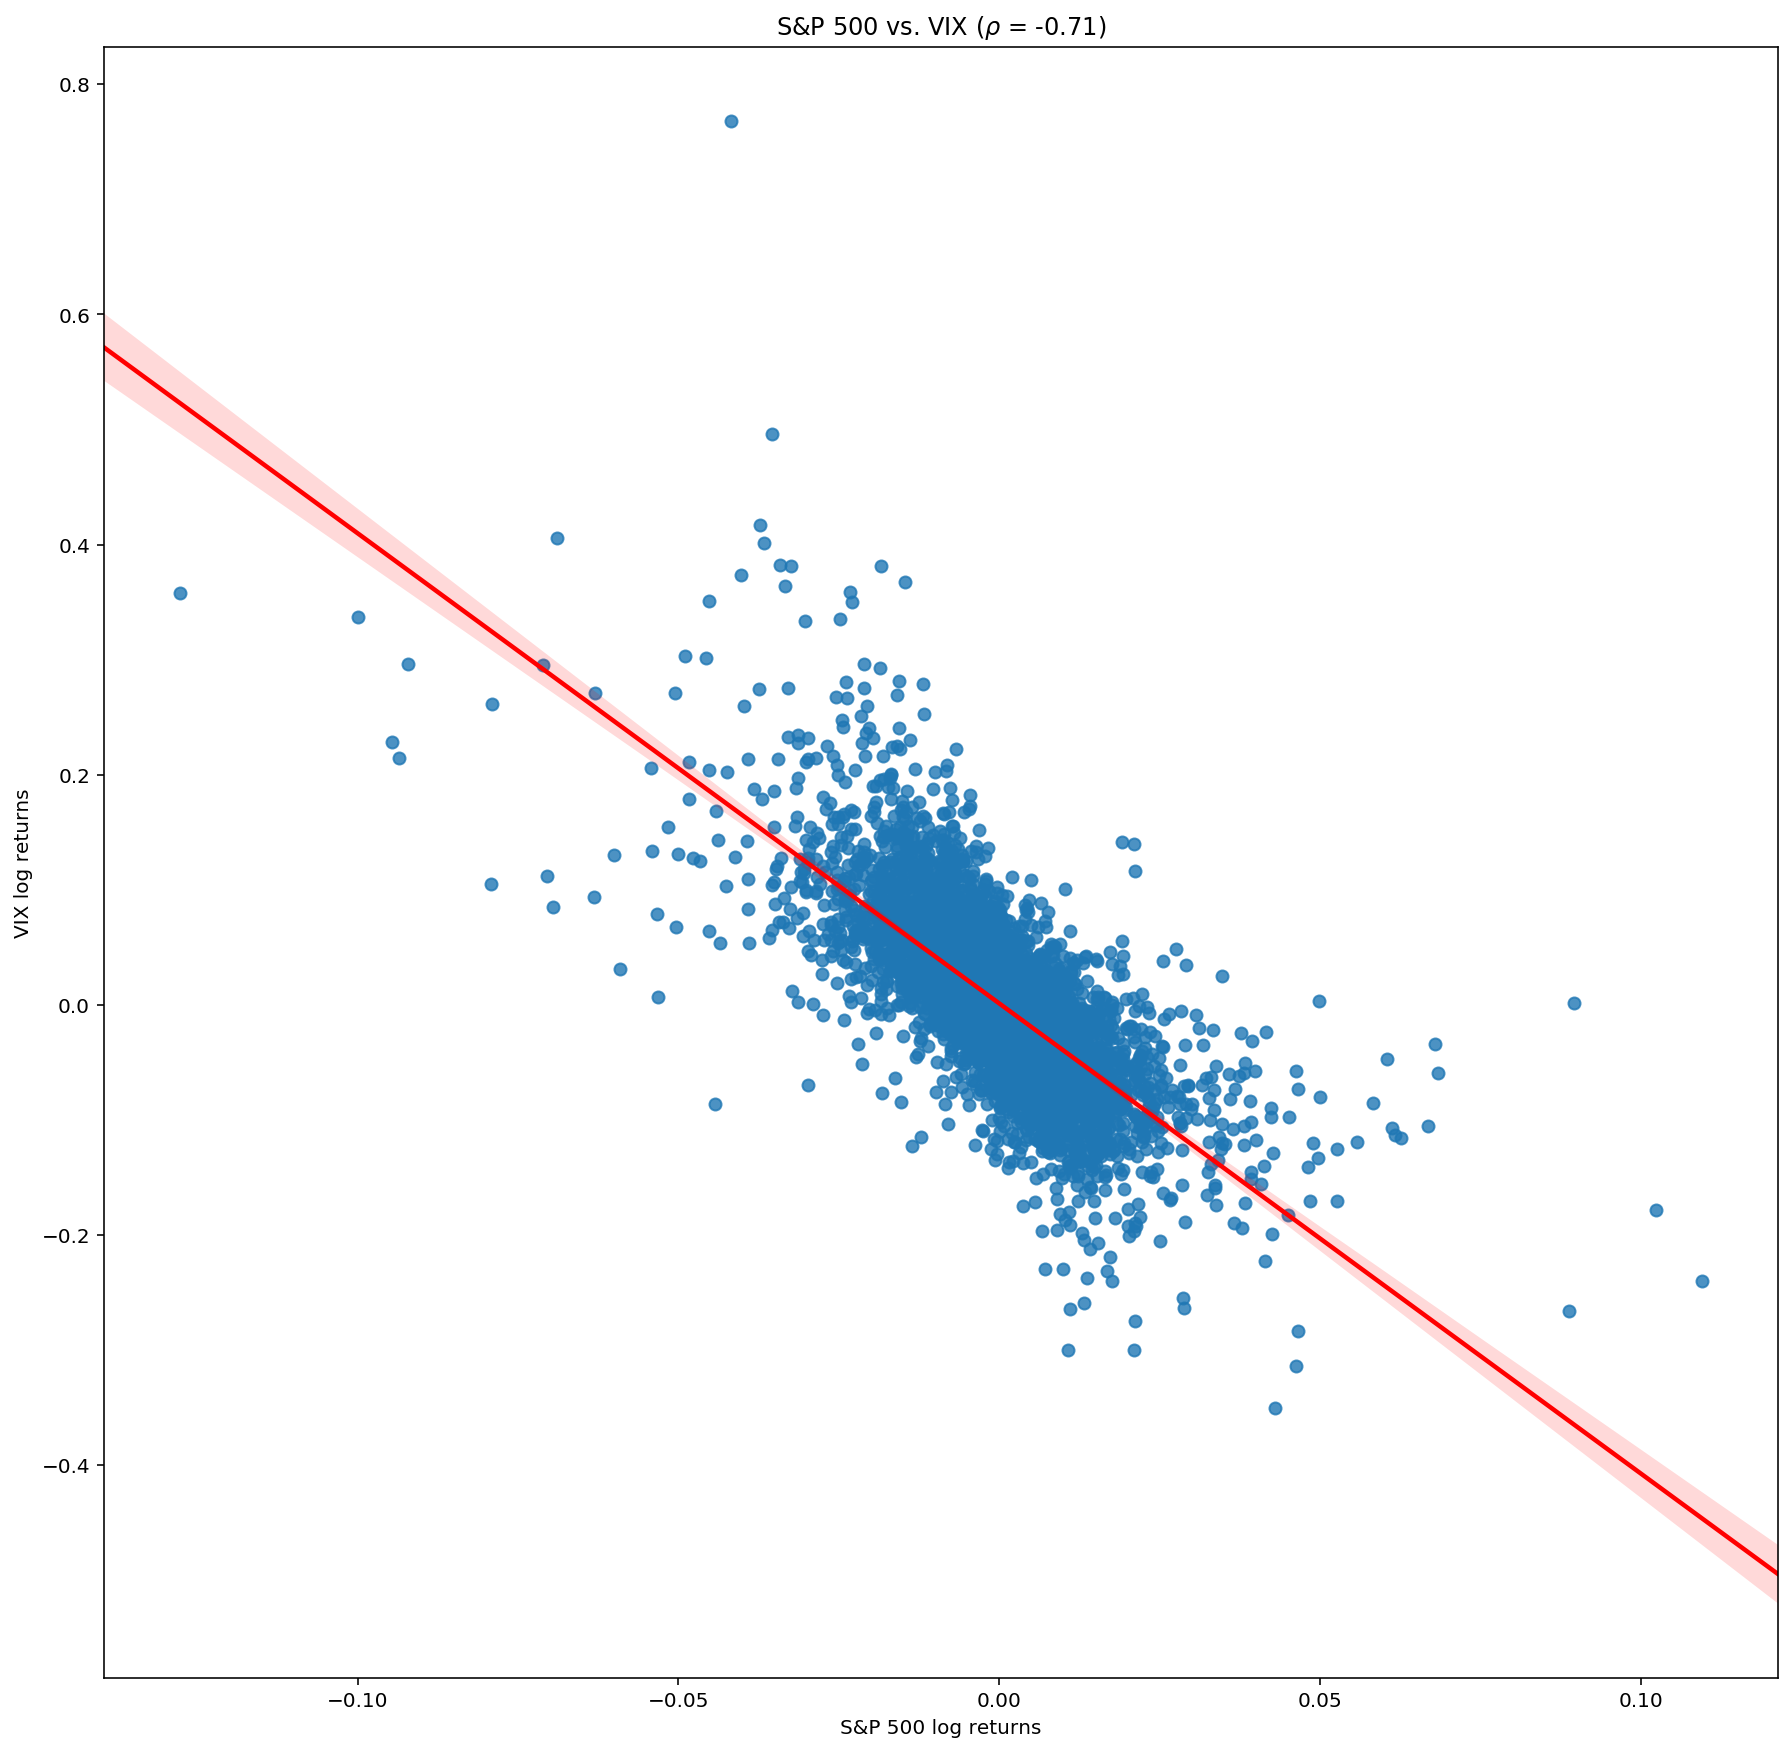

In [209]:
## Calculate the log returns (we can just as well use percentage change-simple returns)

df['log_rtn'] = np.log(df.sp500 / df.sp500.shift(1)) 
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1)) 
df.dropna(how = 'any', axis=0, inplace=True)

## Plot a scatterplot with the returns on the axes and fit a regression line to identify the trend

corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x = 'log_rtn', y = 'vol_rtn', data=df, line_kws = {'color': 'red'})
ax.set(title = f'S&P 500 vs. VIX ($\\rho$ = {corr_coeff:.2f})', ylabel = 'VIX log returns',
xlabel = 'S&P 500 log returns')